

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project Template 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
____________________



## Modeling of oil recovey in core samples 

#### Moises Velasco Lozano
#### Hildebrand Department of Petroleum and Geosystems Egnineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The University of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)


### Executive Summary 

The modeling of oil recovery by imbibition in cores samples is based on conventional approaches that only model the early-time behavior of the experimental data collected. However, to correctly evaluate the potential of imbibition as an oil recovery mechanism it is required to derive a general recovery model for early and late behaviors. Here, we present an exponential model using linear Ridge regression to obtain the model parameters and complexity, learning and showing that oil recovery data can be transformed into an approximated linear model to find the model parameters and level of complexity to be later used in the exponential model. Therefore, based on the results obtained, I would recommend to investigate methods of exponential regression using other sources of information to demonstrate the ability of this approach to model data presenting a characteristic S-shaped form.

### Import Packages

Here it is listed the packages used in this workflow 

In [1]:
import numpy as np                              # for working with data and model arrays
import pandas as pd                             # DataFrames for tabular data
import os                                       # set working directory, run executables
import matplotlib.pyplot as plt                 # for plotting
from scipy import stats                         # summary statistics
import math                                     # mathematical functions
import seaborn as sns                           # for matrix scatter plots
import pandas.plotting as pd_plot               # matrix scatter plots
from scipy import linalg                        # for linear regression
from sklearn.feature_selection import RFE       # for recursive feature selection
from sklearn.linear_model import LinearRegression # linear regression model
import geostatspy.GSLIB as GSLIB                # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats          # GSLIB methods convert to Python  
import copy                                     # make copies of data
from sklearn.cluster import SpectralClustering  # spectral clustering
from sklearn.preprocessing import MinMaxScaler  # min/max normalization
import scipy
from sklearn.cluster import KMeans              # K-means clustering function                         
import scipy.stats as st                                    # statistical methods
from sklearn.metrics import mean_squared_error, r2_score    # specific measures to check our models
from sklearn.linear_model import Ridge                      # ridge regression implemented in scikit learn
from sklearn.preprocessing import StandardScaler            # standardize the features
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import train_test_split        # train and test split

### Functions

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_Feature_Ranking.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb) used to calculate the correlation matrix between features

In [2]:
def plot_corr(dataframe,size=10):                               # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

### Load Data

The following workflow applies the .csv files 'cores.csv' and 'Recovery.csv', experimental data obtained from static imbibition experiments in Spraberry and Berea cores reported by Fidra (1998). The information can be consulted in: Fidra, Y.: A Study of Imbibition Mechanisms in the Naturally Fractured Spraberry Trend Area. MS Thesis, New Mexico Institute of Mining and Technology, Socorro, New Mexico (November 1998)

#### Physical properties of the core samples

We will work with the following features contained in the data file cores.csv:

* **Porosity $(\phi)$**  - fraction of rock void, in units of percentage
* **Permeability $(k)$** - ability of a fluid to flow through the rock, in miliDarcy (md)
* **Ultimate recovery $(URec)$** - fraction of ultimate oil recovered from the cores, in units of percentage 
* **Height $(H)$** - height of the core samples, in units of cm
* **Diameter $(D)$** - diameter of the core samples, in units of cm
* **Initial water saturation $(Swi)$** - initial water saturation in the core samples, in units of percentage
* **Pore volume $(PV)$** - pore volume of the core, in units of $cm^3$

The information reported corresponds to 28 rock samples from Berea and Spraberry cores. A more detailed explanation is given next.

- - -

#### Oil recovery data of the core samples

In additon, we will work with the following features contained in the data file Recovery.csv


* **Oil Recovery $(B1, S1)$**  - fraction of oil recovered from the cores as a function of time, in units of percentage
* **time $(tb1,ts1)$** - time, in units of hours

file Recovery.csv contains data for two different cores: Berea and Spraberry. The number of Berea cores is 13, and the number of Spraberry cores is 15, which are reported in columns of time and oil recovery for each sample.

* For Berea cores we have: tb1 - B1, tb2 - B2, ..., tb13 - B13

where tb1, tb2, ..., tb13 are the columns for time; and B1, B2, ..., B13 are the columns of recovery for the respective cores

* For Spraberry cores we have: ts1 - S1, ts2 - S2, ..., ts15 - S15

where ts1, ts2, ..., ts15 are the columns for time; and S1, S2, ..., S15 are the columns of recovery for the respective cores

---



<div>
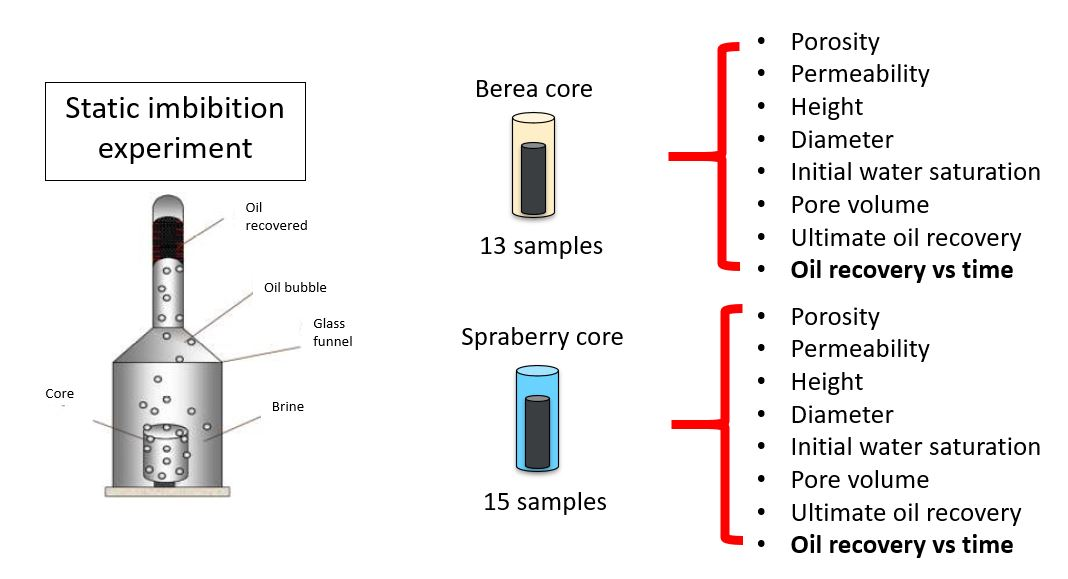
</div>


Finally, general physical properties for all cores samples are:

\begin{equation}
\sigma=26\;dynes/cm \\
\mu_o=5.92\;cp\\
\mu_w=0.68\;cp \\
\end{equation}


\begin{equation}
\sigma \; \text{is the interfacial tension expressed in units of dyne/cm } \\
\mu_o \; \text{is oil viscosity expressed in units of cp} \\
\mu_w \; \text{is water viscosity expressed in units of cp} \\
\end{equation}


Here we define the working directory and the the dataframes used during the process 

In [3]:
os.chdir("d:/PGE383")               # set the working directory
core = pd.read_csv("PGE383_Project_Moises_Velasco_data1.csv")  # data file containing rock properties of the cores
data = pd.read_csv("PGE383_Project_Moises_Velasco_data2.csv")  # data file containing the oil recovery data

data_ori=data.copy()            # deep copy of the Recovery to be used for predictive model
sample=data.copy()              # deep copy of the Recovery for the calculation of the normalized recovery data
new=data.copy()                 # deep copy of Recovery to save the original data (no manipulated)

### Basic Data Checking and Visualization

Here we will check the physical properties of the cores assigned into the "core" dataframe, and the oil recovery as a function of time assigned into the "data" dataframe to perform a visual inspection of information before performing any calculation 

#### Properties and characteristics of all core samples

The first step is to visualize the format of the data previously described. 

In [4]:
core.head(n=4)  # show the first 4 rows and all the columns of the data set  

Unnamed: 0    Por   Perm  Height  Diameter    Swi    PV  URecovery
0           1  15.91  74.70   4.920      3.62  41.63  8.05      44.68
1           2  17.59  67.87   4.610      3.62   0.00  8.34      50.48
2           3  15.94  86.13   4.940      3.62  41.96  8.10      43.62
3           4  17.53  70.51   4.605      3.62   0.00  8.30      54.22

As it is observed, the first column is unameed and it only contains the index of the data, we will remove it
to have a clean data containing only the features and avoid incorrect interpretation of the following 
functions. In additon, we will calculate basic statistics and characteristics of our features

In [5]:
core = core.iloc[:,1:]             # remove the unamed index 
core.describe().transpose()        # calculate basic statistics and transpose the information 

count       mean        std     min       25%      50%       75%  \
Por         44.0  14.487500   3.848362   8.280  10.67750  15.2350  17.28500   
Perm        44.0  67.579091  88.150544   0.080   0.22750  52.9350  75.56750   
Height      44.0   6.323364   0.756929   4.605   5.82275   6.4770   6.93275   
Diameter    44.0   3.670045   0.088583   3.594   3.60700   3.6075   3.78550   
Swi         44.0  23.210000  18.159346   0.000   0.00000  33.6200  38.09750   
PV          44.0   9.685000   3.335172   5.130   6.53000   8.3200  12.89250   
URecovery   44.0  46.441727   9.209653  14.350  41.93750  46.9750  50.61000   

               max  
Por         21.000  
Perm       294.010  
Height       7.391  
Diameter     3.810  
Swi         43.720  
PV          15.160  
URecovery   61.300

No evident issues are observed such as negative values. To corroborate that the unnamed column was removed we visualize the data again

In [6]:
core.head()   # show the first 4 rows and all the columns of the data set  

Por   Perm  Height  Diameter    Swi    PV  URecovery
0  15.91  74.70   4.920     3.620  41.63  8.05      44.68
1  17.59  67.87   4.610     3.620   0.00  8.34      50.48
2  15.94  86.13   4.940     3.620  41.96  8.10      43.62
3  17.53  70.51   4.605     3.620   0.00  8.30      54.22
4  13.07  11.00   6.769     3.785   0.00  9.95      43.22

In order to determine the degree of correlation between the features we calculate the correlation matrix. This is going to help us to see if oil recovery is related to other feautures reported in the experimental work.

In [7]:
corr_matrix = np.corrcoef(core.iloc[:,0:7], rowvar = False)  # correlation matrix
print(np.around(corr_matrix,2)) 

[[ 1.    0.86  0.14  0.6  -0.49  0.92  0.38]
 [ 0.86  1.    0.08  0.62 -0.21  0.79  0.17]
 [ 0.14  0.08  1.    0.34 -0.39  0.47  0.24]
 [ 0.6   0.62  0.34  1.   -0.19  0.7  -0.03]
 [-0.49 -0.21 -0.39 -0.19  1.   -0.54 -0.49]
 [ 0.92  0.79  0.47  0.7  -0.54  1.    0.42]
 [ 0.38  0.17  0.24 -0.03 -0.49  0.42  1.  ]]


To visualize the correlation matrix we use the following function

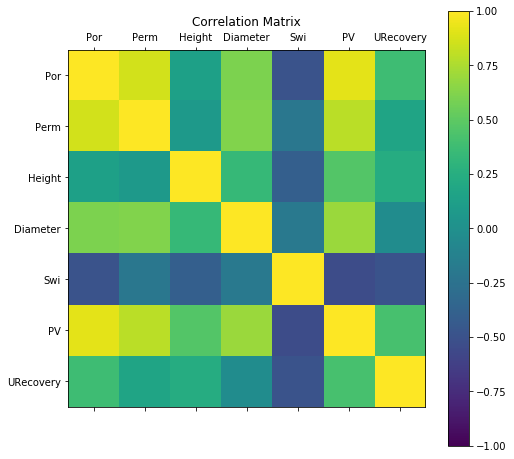

In [8]:
plot_corr(core.iloc[:,0:7],8)                            # using our correlation matrix visualization function
plt.show()

The results obtained show ultimate oil recovery (URecovery) has a low degree of correlation with the other features  (less than 0.5 in magnitude). 

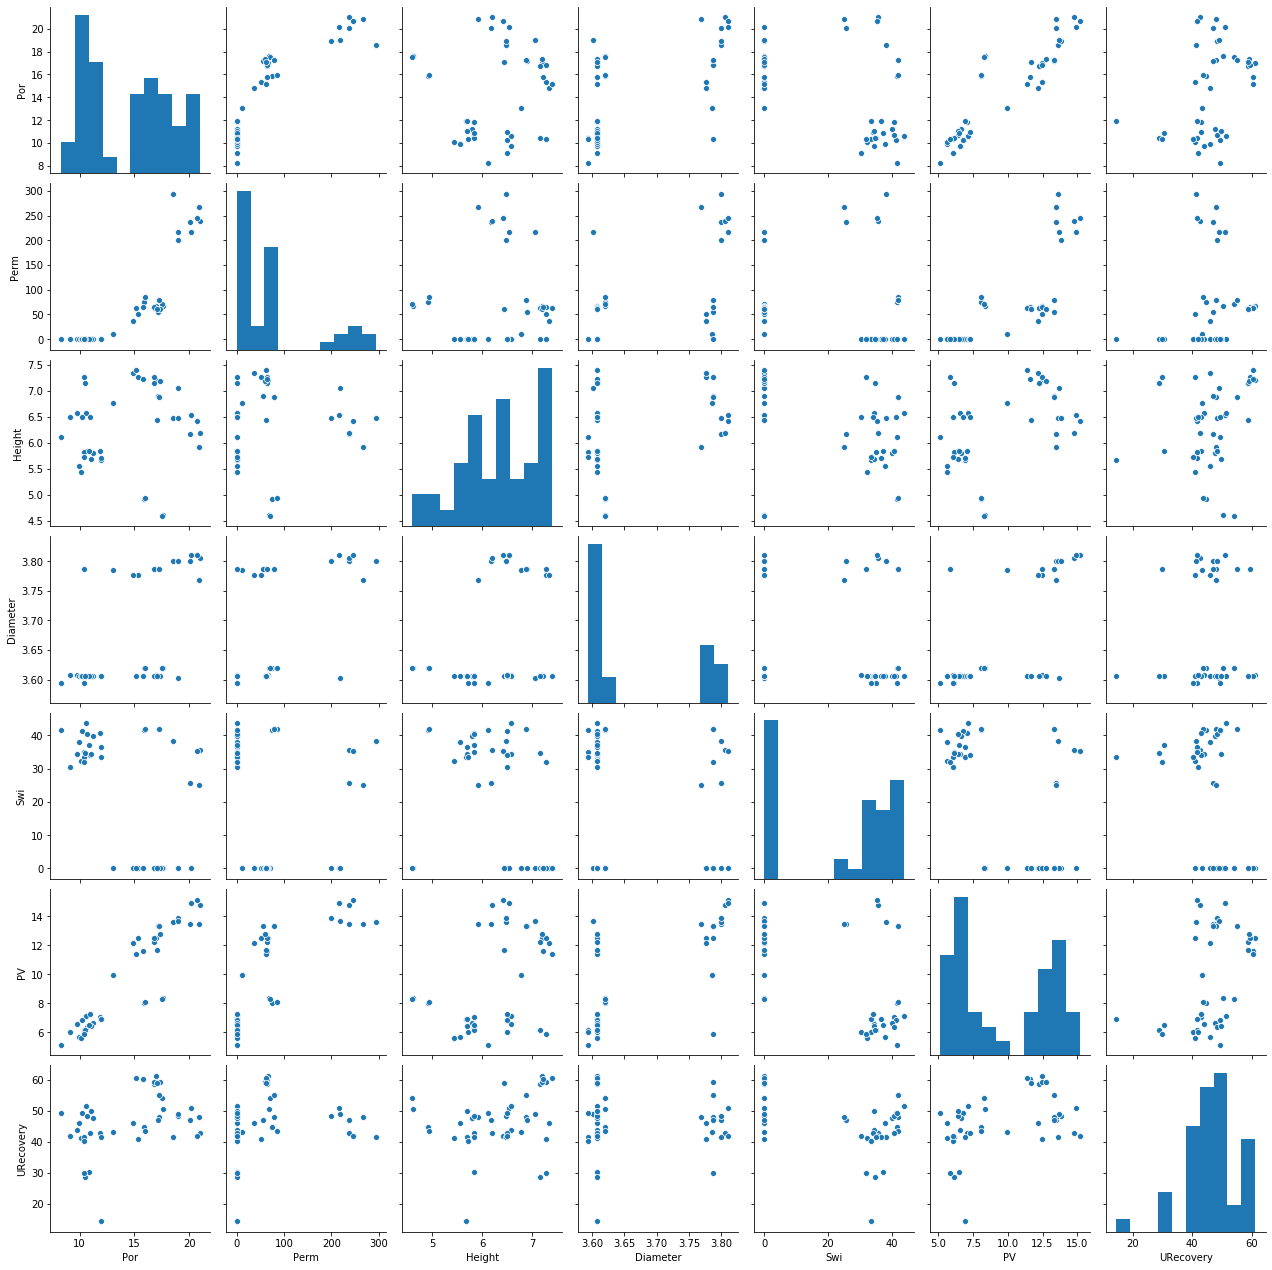

In [9]:
sns.pairplot(core,vars=['Por','Perm','Height','Diameter','Swi','PV','URecovery'],markers='o')

<span style="color:blue">**Remarks:**</span> 

The visualization of the bivariate relationship between all features is performed to identify trends or the degree of correlation obained by the correlation matrix above. Based on the bivariate results we can make the following conclusions:

* There is a strong correlation between porosity and permeability
* There is a strong correlation between porosity and pore volume
* Ultimate oil recovery seems to be linearly correlated with: porosity, permeability, height and pore volume

Altough some features present a level of correlation with ultimate recovery, the limited number of samples restricts the building of a predictive model independent of time since experimental data are scarse most of the times because they are expensive.

#### Recovery data as a function of time for all core samples

The following step is to analize the oil recovery data as a function of time for each of the 28 cores samples. Here we will examine if there are negative values and significant outliers. It must be recalled, here we have information of oil recovery and corresponding time for Berea and Spraberry cores. tb and ts stand for time for Berea and Spraberry cores, respectively, and B and S stand for recovery for Berea and Spraberry core, respectively. The number following these labels indicates the number of core. Here, we visualize the format of the data contained in "Recovery" dataframe

In [10]:
data.head(n=4)  # show the first 4 rows and all the columns of the data set

tb1     B1  tb2     B2   tb3     B3   tb4     B4  tb5    B5  ...  ts11  \
0  0.02   2.13  0.5   0.10  0.07   8.51  0.03   0.10  0.3  1.01  ...   1.0   
1  0.03   6.38  0.7   1.20  0.09  10.64  0.08   1.20  0.5  3.02  ...   2.0   
2  0.07  14.89  1.0   3.00  0.14  12.77  0.25   6.02  0.8  5.03  ...   3.0   
3  0.27  27.66  2.0  13.19  0.18  14.89  0.69  16.87  1.0  7.04  ...   9.0   

    S11  ts12   S12   ts13    S13  ts14   S14  ts15    S15  
0  1.32   0.5  1.95   12.0  0.100   6.0  0.10  12.0  0.100  
1  2.63   2.0  6.10   24.0  1.282  12.0  0.50  24.0  1.667  
2  3.95   3.0  7.32   48.0  2.564  30.0  1.25  72.0  3.333  
3  5.26   3.5  8.54  120.0  5.128  48.0  2.50  96.0  5.000  

[4 rows x 56 columns]

We visualize the information for each set independently since the cores have particular properties and oil recovery profiles. We used two different loops and plotted the columns in pairs. To correclty interpret the results we separated the data for Berea and Spraberry cores, furthermore, we used a semilog scale in the x axes (time) to properly visualize the results

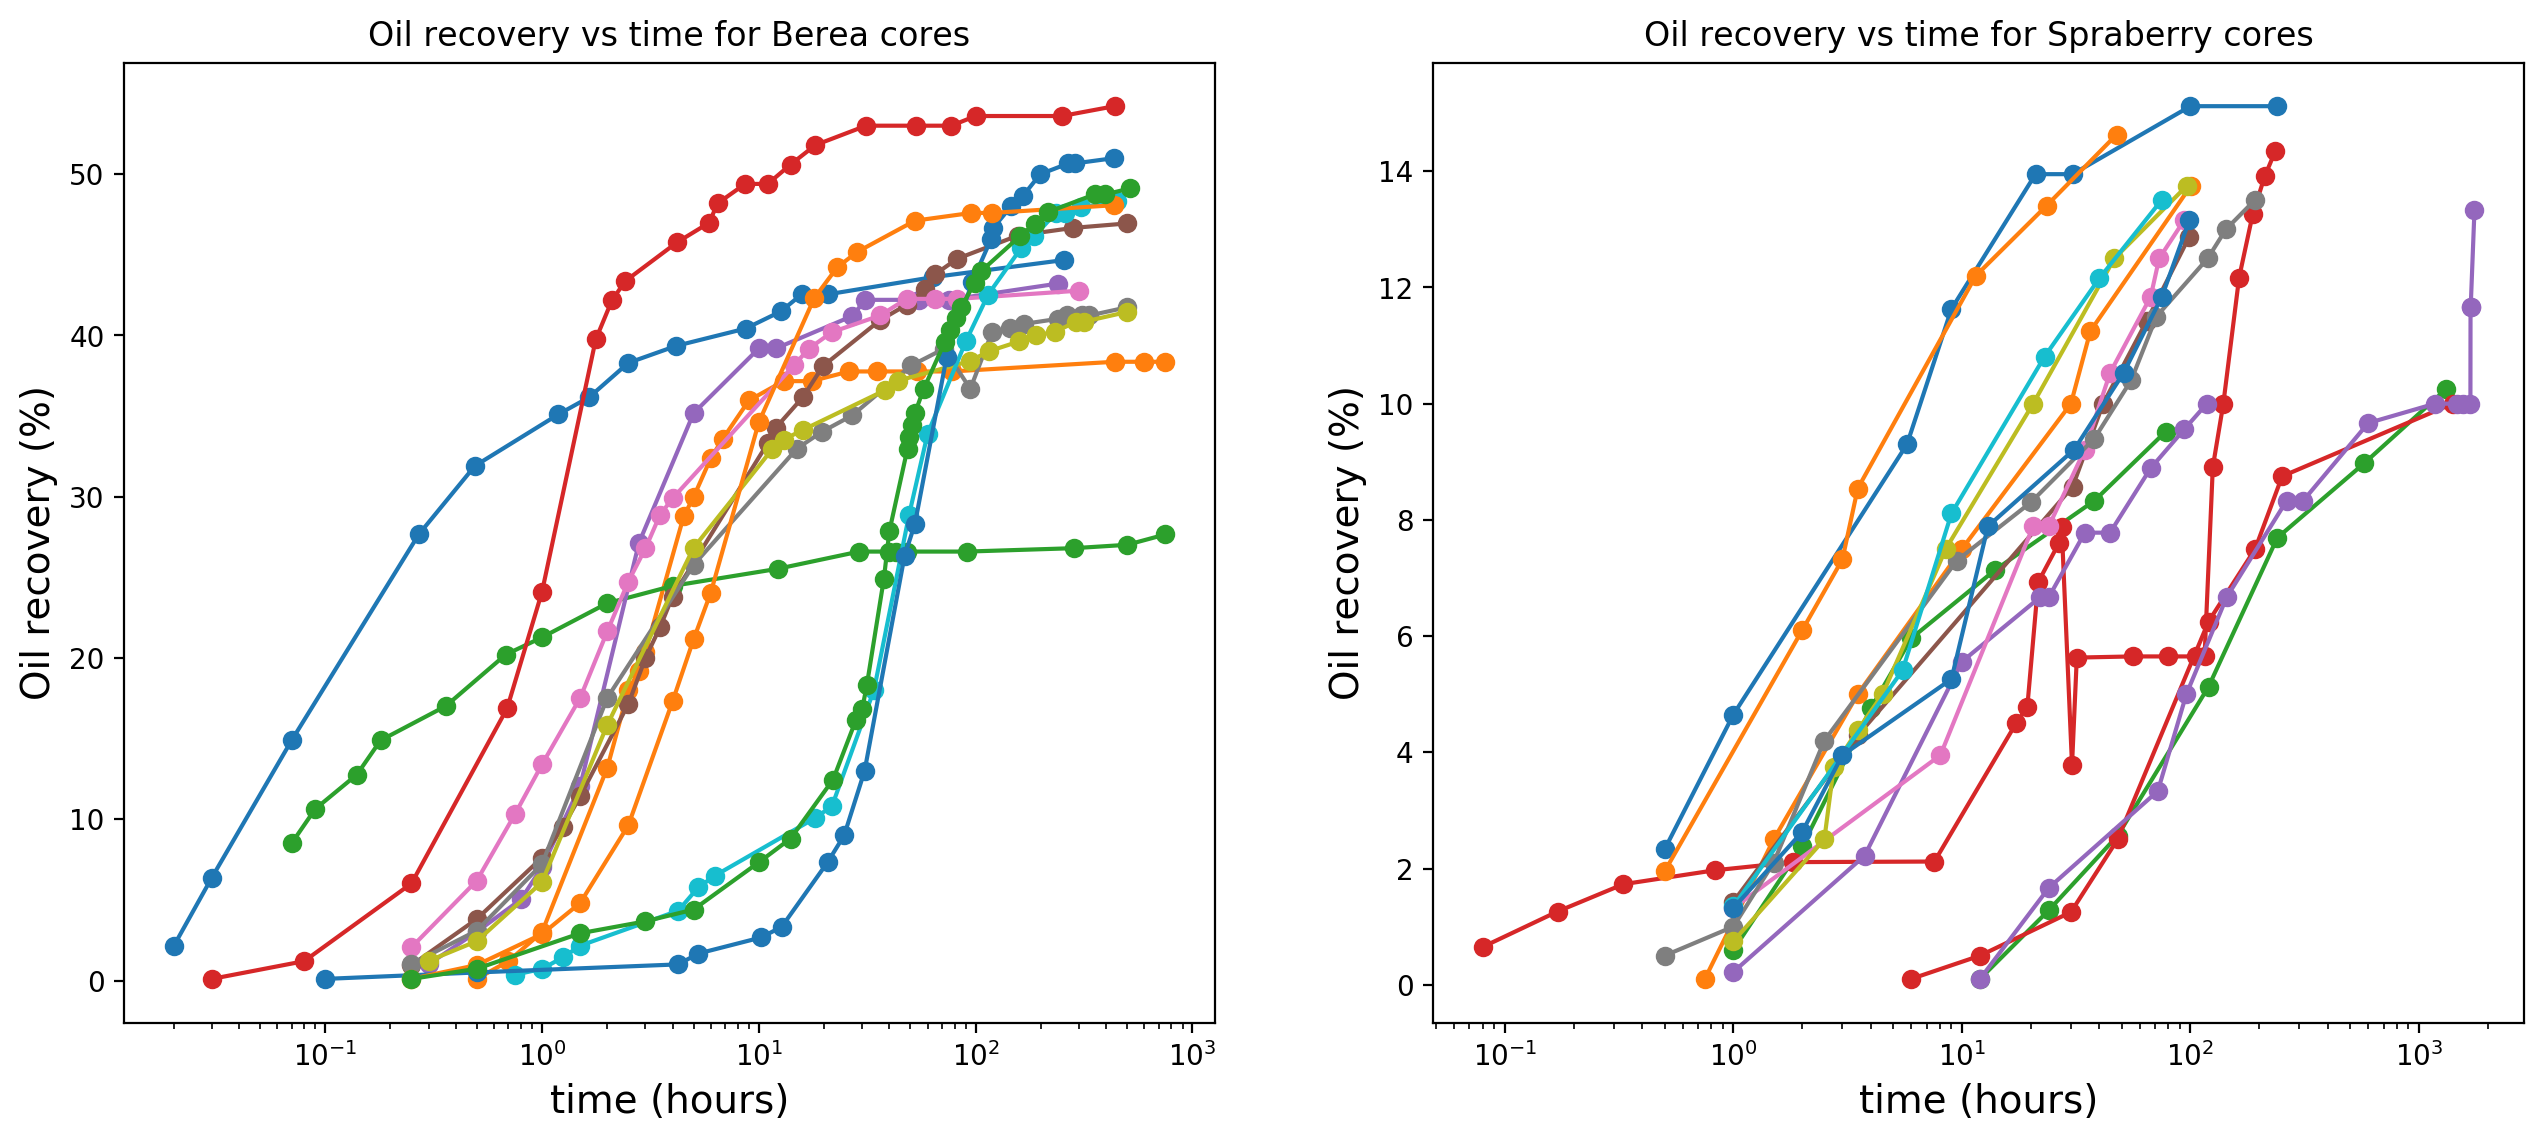

In [11]:
plt.figure(dpi=200)
plt.subplot(121)
for i in range (0,13):
    plt.semilogx(data.iloc[:,2*i],data.iloc[:,2*i+1],'o-') #the information is plotted in semilog scale
plt.title('Oil recovery vs time for Berea cores')
plt.xlabel('time (hours)', fontsize=14)
plt.ylabel('Oil recovery (%)', fontsize=14)

plt.subplot(122)
for i in range (13,28):
    plt.semilogx(data.iloc[:,2*i],data.iloc[:,2*i+1],'o-') #the information is plotted in semilog scale
plt.title('Oil recovery vs time for Spraberry cores')
plt.xlabel('time (hours)', fontsize=14)
plt.ylabel('Oil recovery (%)', fontsize=14)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show() 

<span style="color:blue">**Remarks:**</span> 
   * Each core sample reaches a particular ultimate oil recovery (max recovery)
   * The number of data for each core is variable 
   * Time of recovery for both samples ranges aproximately from $10^{-1}$ to $10^3$ hours
   * It will be required to scale all data to have a better interpreration
   * The use of the data as presented would be inefficient requiring multiple models to make predictions of oil recovery with time

### Scaling of time and Recovery

As observed in the previous plots, the recovery data for Berea and Spraberry cores requires a further scaling in time before grouping them into a single dataset to perform calculations and derive the predictive model. A conventional approach used to scale the data into a narrow distribution is the use of a dimensionless time $t_D$ defined below:

\begin{equation}
t_D=1.13 \times t \times \frac{\sigma}{\sqrt{\mu_o \times \mu_w}} \sqrt{\frac{k}{\phi}} \frac{1}{L_c^2} \\
L_c=\frac {2H + 4r^2}{r^2H^2} \\
r=0.5D
\end{equation}

                           where:
\begin{equation}
t \; \text{is the time expressed in units of hours } \\
\sigma \; \text{is the interfacial tension expressed in units of dyne/cm } \\
\mu_o \; \text{is the oil viscosity expressed in units of cp} \\
\mu_w \; \text{is the water viscosity expressed in units of cp} \\
k \; \text{is the permeability expressed in units of md} \\
\phi \; \text{is the porosity expressed in fraction} \\
1.13\; \text{is a scaling factor for the variables and corresponding units described}\\
L,\; H \; \text{and}\; r \; \text{are the lenght, height and and radius of the cores, respectively, expressed in units of cm}\\
\end{equation}
        


 
        
        


To simplyfy the above calculation we define the following constant $C$ as follows since the interfacial tension and viscosities are the same for all the core samples in our experimental dataset:

\begin{equation}
C=1.13  \times \frac{\sigma}{\sqrt{\mu_o \times \mu_w}} = 1.13 \times \frac{26}{\sqrt{5.92 \times 0.68}} =14.64 \\
\end{equation}

The following loops perform the transformation of time to $t_D$ and scale the oil recovery going from zero to one. In this case the scaling process is made for each core since they have different properties 

In [12]:
#loops to transform time and oil recovery contained in "data" dataframe------- 
#loop for Berea cores
for i in range (0,13):
    data.iloc[:,2*i+1]=(data.iloc[:,2*i+1]-np.min(data.iloc[:,2*i+1]))/(np.amax(data.iloc[:,2*i+1])-np.min(data.iloc[:,2*i+1])) 
    data.iloc[:,2*i]=14.64*data.iloc[:,2*i]*((core.iloc[i,1]/(core.iloc[i,0]/100))**0.5*((2*core.iloc[i,2]**2+4*(0.5*core.iloc[i,3])**2)/(core.iloc[i,2]**2*(0.5*core.iloc[i,3])**2))**2)
#loop for Spraberry core
for i in range (13,28):
    data.iloc[:,2*i+1]=(data.iloc[:,2*i+1]-np.min(data.iloc[:,2*i+1]))/(np.amax(data.iloc[:,2*i+1])-np.min(data.iloc[:,2*i+1]))    
    data.iloc[:,2*i]=14.64*data.iloc[:,2*i]*((core.iloc[i+12,1]/(core.iloc[i+12,0]/100))**0.5*((2*core.iloc[i+12,2]**2+4*(0.5*core.iloc[i+12,3])**2)/(core.iloc[i+12,2]**2*(0.5*core.iloc[i+12,3])**2))**2)  
#----------------------------------------------------------------------------
#loops to transform time and oil recovery contained in "sample" dataframe-----
#loop for Berea cores    
for i in range (0,13):
    sample.iloc[:,2*i+1]=(sample.iloc[:,2*i+1]-np.min(sample.iloc[:,2*i+1]))/(np.amax(sample.iloc[:,2*i+1])-np.min(sample.iloc[:,2*i+1])) 
    sample.iloc[:,2*i]=14.64*sample.iloc[:,2*i]*((core.iloc[i,1]/(core.iloc[i,0]/100))**0.5*((2*core.iloc[i,2]**2+4*(0.5*core.iloc[i,3])**2)/(core.iloc[i,2]**2*(0.5*core.iloc[i,3])**2))**2)
#loop for Spraberry cores
for i in range (13,28):
    sample.iloc[:,2*i+1]=(sample.iloc[:,2*i+1]-np.min(sample.iloc[:,2*i+1]))/(np.amax(sample.iloc[:,2*i+1])-np.min(sample.iloc[:,2*i+1]))    
    sample.iloc[:,2*i]=14.64*sample.iloc[:,2*i]*((core.iloc[i+12,1]/(core.iloc[i+12,0]/100))**0.5*((2*core.iloc[i+12,2]**2+4*(0.5*core.iloc[i+12,3])**2)/(core.iloc[i+12,2]**2*(0.5*core.iloc[i+12,3])**2))**2)  

To visualize the transformation of time to dimensionless form we separately plot the results for Berea and Spraberry cores. 

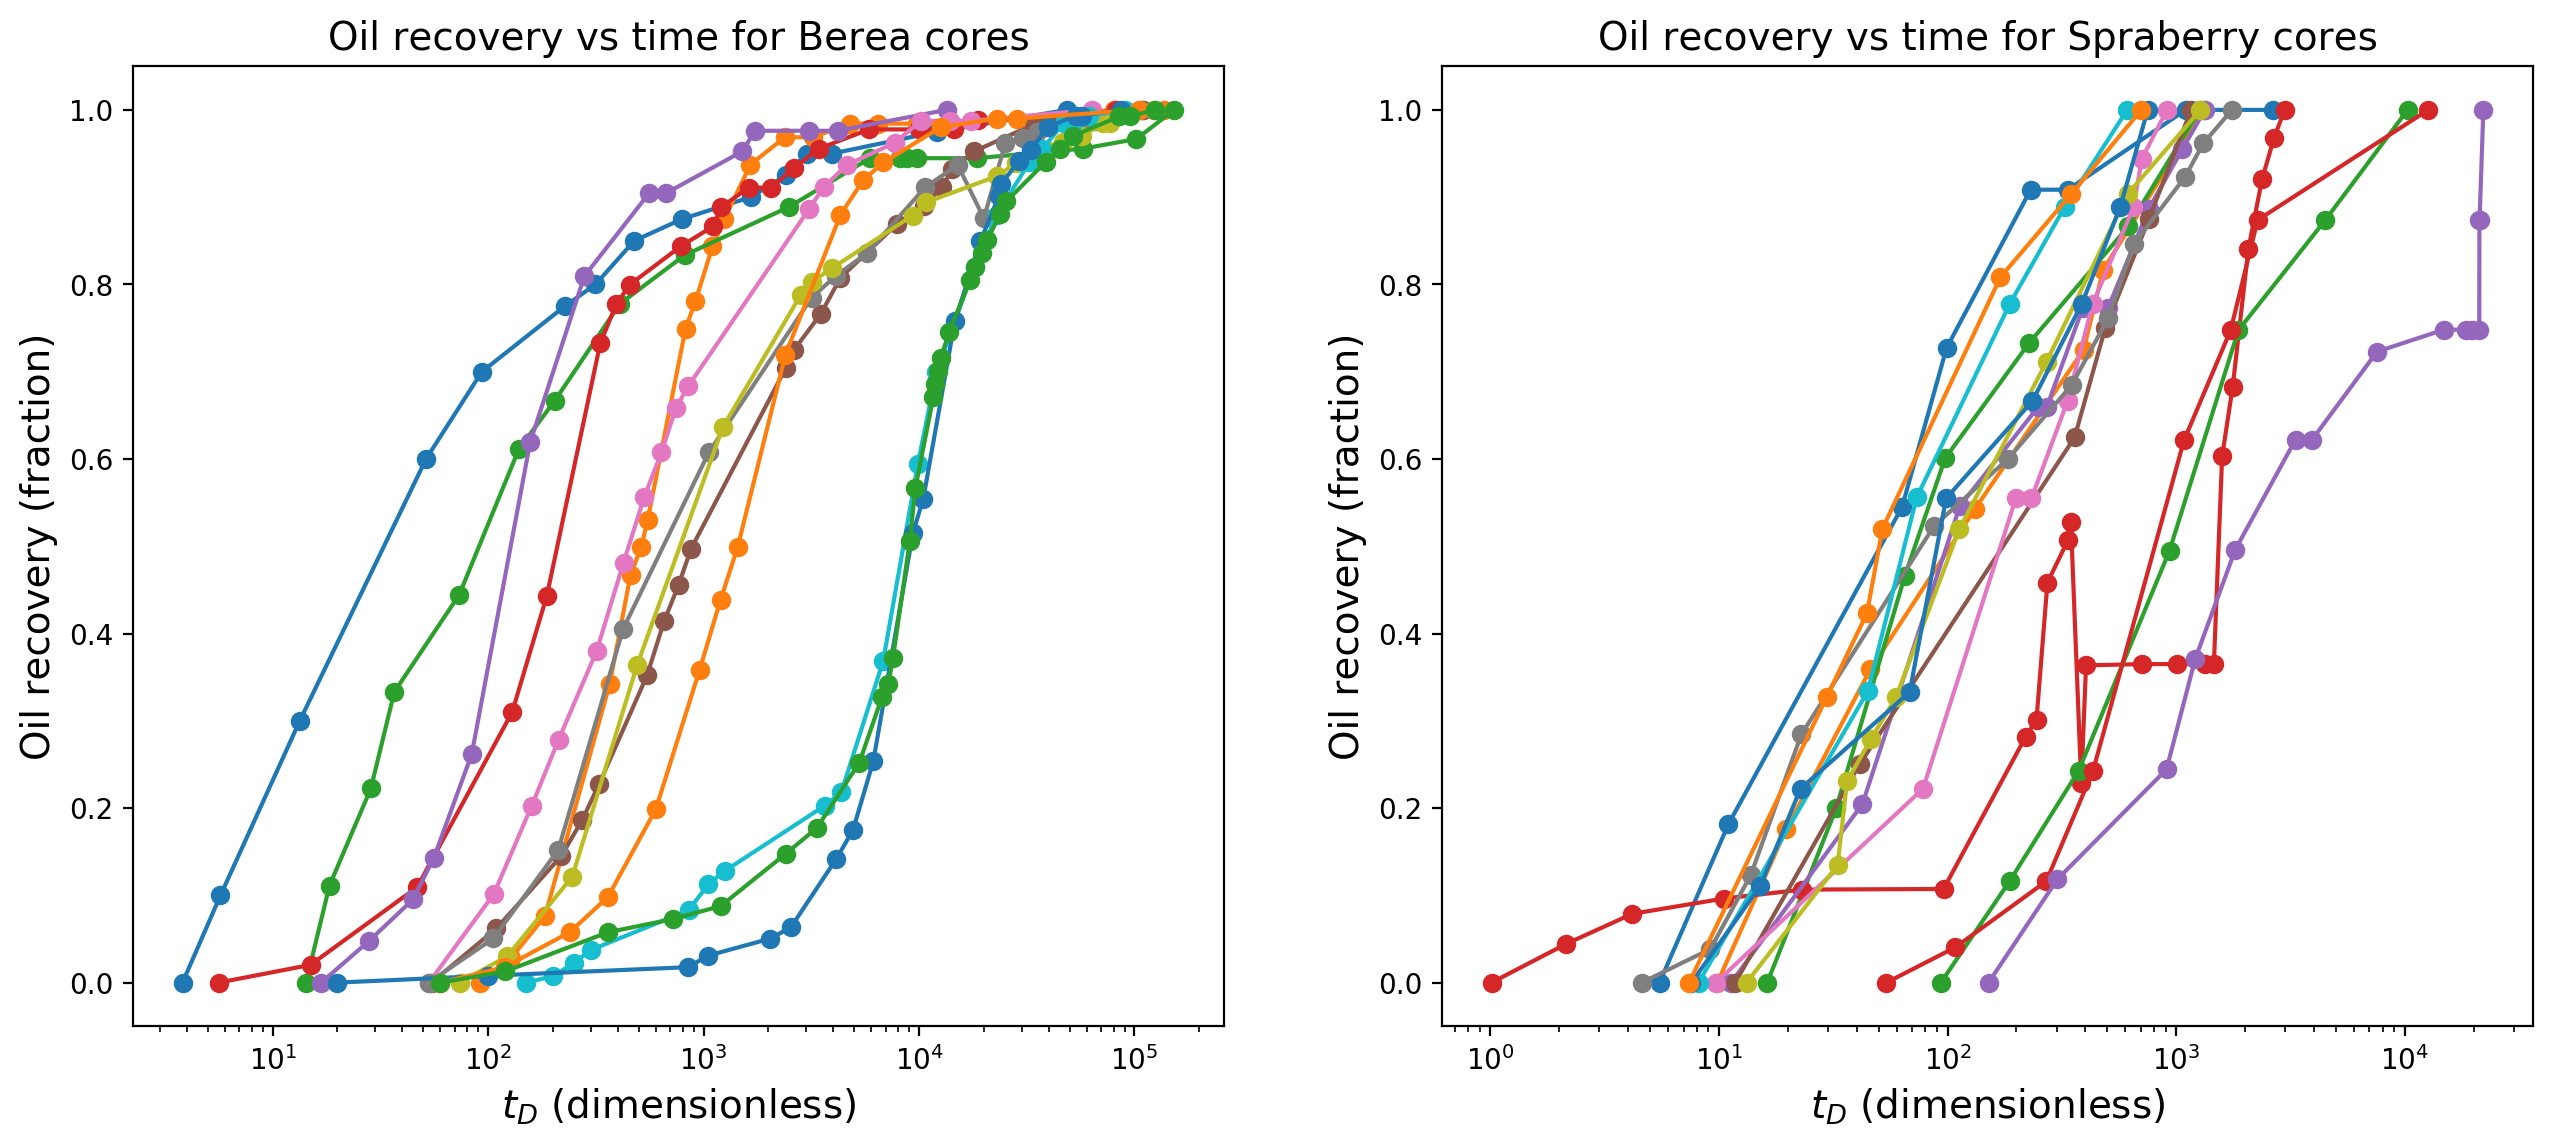

In [13]:
plt.figure(dpi=200)
#Berea core-------------------------------------------------------------------
plt.subplot(121)
for i in range (0,13):
    plt.semilogx(data.iloc[:,2*i],data.iloc[:,2*i+1],'-o')  
plt.title('Oil recovery vs time for Berea cores', fontsize=14)
plt.xlabel('$t_D$ (dimensionless)', fontsize=14)
plt.ylabel('Oil recovery (fraction)', fontsize=14)   
#Spraberry core---------------------------------------------------------------
plt.subplot(122)    
for i in range (13,28):
    plt.semilogx(data.iloc[:,2*i],data.iloc[:,2*i+1],'-o')    
plt.title('Oil recovery vs time for Spraberry cores', fontsize=14)
plt.xlabel('$t_D$ (dimensionless)', fontsize=14)
plt.ylabel('Oil recovery (fraction)', fontsize=14)    

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()      

<span style="color:blue">**Remarks:**</span> 
   * The scaling of recovery leads to have a normalized range going from 0 to 1, which enables to interpret the recovery for each sample based on the same range
   * The scaling of time with $t_{D}$ does not show a significant improvement on time to have narrow distribution
   * For Berea cores it is clearly observed the characteristic S-shaped form of recovery, which indicates that the data were obtained from long-term experiments.
   * For Spraberry cores the data describe a more linear behavior, it could have occured due to a short-term experiment, which ignored the data at late times because it is observed a sudden stop in recovery

### Grouping of recovery data

The recovery information for both cores is a function of $t_{D}$, however, we require to group both datasets to perform further calculations considering a single dataset and build a general model instead that multiple ones for each core. Since the information for each core has a different number of experimental measurements (data in the dataframe), it is required to identify the particular amount of data before grouping them into two general features. We will perform the following tasks to achieve this:

* Identify each column length in the dataframe by assigning a negative value -1
* Group the data of time and recovery for each core (28 samples) into only two unique features
* Create a new dataframe to be used in the clustering methods discussed next


We used the .fillna() funciton to fill the missing data with -1 to easily identify the lenght of each column later in the grouping process, here we can observe negative values replacing the missing values (NaN).

In [14]:
data =data.fillna(-1)
data.head(n=10) 

tb1        B1          tb2        B2          tb3        B3  \
0     3.817813  0.000000    91.724005  0.000000    14.285457  0.000000   
1     5.726720  0.099882   128.413607  0.028743    18.367016  0.111227   
2    13.362347  0.299882   183.448009  0.075777    28.570914  0.222454   
3    51.540480  0.600000   366.896019  0.342043    36.734033  0.333159   
4    93.536427  0.699882   458.620023  0.467468    73.468065  0.444386   
5   227.159895  0.775088   513.654426  0.498824   138.773012  0.610966   
6   314.969602  0.800000   550.344028  0.529919   204.077959  0.666841   
7   477.226670  0.850059   825.516042  0.749412   408.155918  0.777546   
8   796.014085  0.874971   917.240047  0.780768   816.311836  0.833420   
9  1658.839903  0.900118  1100.688056  0.843481  2491.791879  0.888773   

           tb4        B4          tb5        B5  ...        ts11       S11  \
0     5.624802  0.000000    16.799785  0.000000  ...    7.581912  0.000000   
1    14.999473  0.020325    27.999642  0.047619  ...   15.163823  0.110642   
2    46.873353  0.109387    44.799426  0.095238  ...   22.745735  0.222128   
3   129.370454  0.309867    55.999283  0.142857  ...   68.237205  0.332770   
4   187.493412  0.443459    83.998925  0.261786  ...   98.564851  0.554899   
5   331.863340  0.732816   156.797993  0.619048  ...  235.039260  0.666385   
6   393.736166  0.777347   279.996415  0.809524  ...  386.677492  0.777872   
7   453.734058  0.799520   559.992831  0.904762  ...  568.643371  0.888514   
8   787.472332  0.844050   671.991397  0.904762  ...  750.609250  1.000000   
9  1106.211133  0.866408  1511.980643  0.952381  ...   -1.000000 -1.000000   

         ts12       S12          ts13       S13          ts14       S14  \
0    7.406378  0.000000     93.499433  0.000000     54.045199  0.000000   
1   29.625513  0.327287    186.998865  0.116384    108.090398  0.040404   
2   44.438269  0.423502    373.997731  0.242615    270.225994  0.116162   
3   51.844647  0.519716    934.994327  0.495077    432.361590  0.242424   
4  170.346697  0.808360   1869.988654  0.747538   1080.903976  0.621212   
5  348.099773  0.903785   4487.972769  0.873769   1729.446361  0.747475   
6  703.605924  1.000000  10284.937595  1.000000   2269.898349  0.873737   
7   -1.000000 -1.000000     -1.000000 -1.000000  12646.576517  1.000000   
8   -1.000000 -1.000000     -1.000000 -1.000000     -1.000000 -1.000000   
9   -1.000000 -1.000000     -1.000000 -1.000000     -1.000000 -1.000000   

           ts15       S15  
0    151.126136  0.000000  
1    302.252272  0.118416  
2    906.756816  0.244313  
3   1209.009089  0.370286  
4   1813.513633  0.496259  
5   3324.774994  0.622157  
6   3929.279538  0.622157  
7   7556.306804  0.722965  
8  14810.361336  0.748130  
9  18437.388602  0.748130  

[10 rows x 56 columns]

The analysis of the data of all core samples requires to group the data into two general features without mixing the information. Therefore, here we created two dataframes to sequentially storage the data for each core sample.

In [15]:
zeros=data.iloc[0:0,1]
r=pd.DataFrame(zeros.values) #dataframe to continously storage recovery data from each core sample
t=pd.DataFrame(zeros.values) #dataframa to continously storage time data from each core sample

#loop for grouping the time and recovery data into two general features--------------------------------------------
for j in range (0,28):    
    n=0                                                    #initialization of the index for each core
    for i in range (0,30):                                 #loop to check each row 
        if (data.iloc[i,2*j]>-1 or data.iloc[i,2*j]==1):   #if statement to identify the lenght of each column
            n=n+1                                          #variable to determine the length of each column
                        
    x=data.iloc[:n,2*j]     #assignment of each time column to a temporal variable
    y=data.iloc[:n,2*j+1]   #assignment of each recovery column to a temporal variable 
        
    z=pd.DataFrame(y.values)  #temporal dataframe to storage the recovery data of each core sample
    w=pd.DataFrame(x.values)  #temporal dataframe to storage the time data of each core sample
            
    r=r.append(z,ignore_index = True)  #storage of all recovery data of each core sample
    t=t.append(w,ignore_index = True)  #storage of all time data of each core sample

 Plotting the results together will provide a better visualization of improvement by using the dimensionless time ($t_D$). In addition, to verify the data corresponfing to time and oil recovery for all the core samples has been properly merged into two unique features we plot the variables  $t$ and $r$ defined above

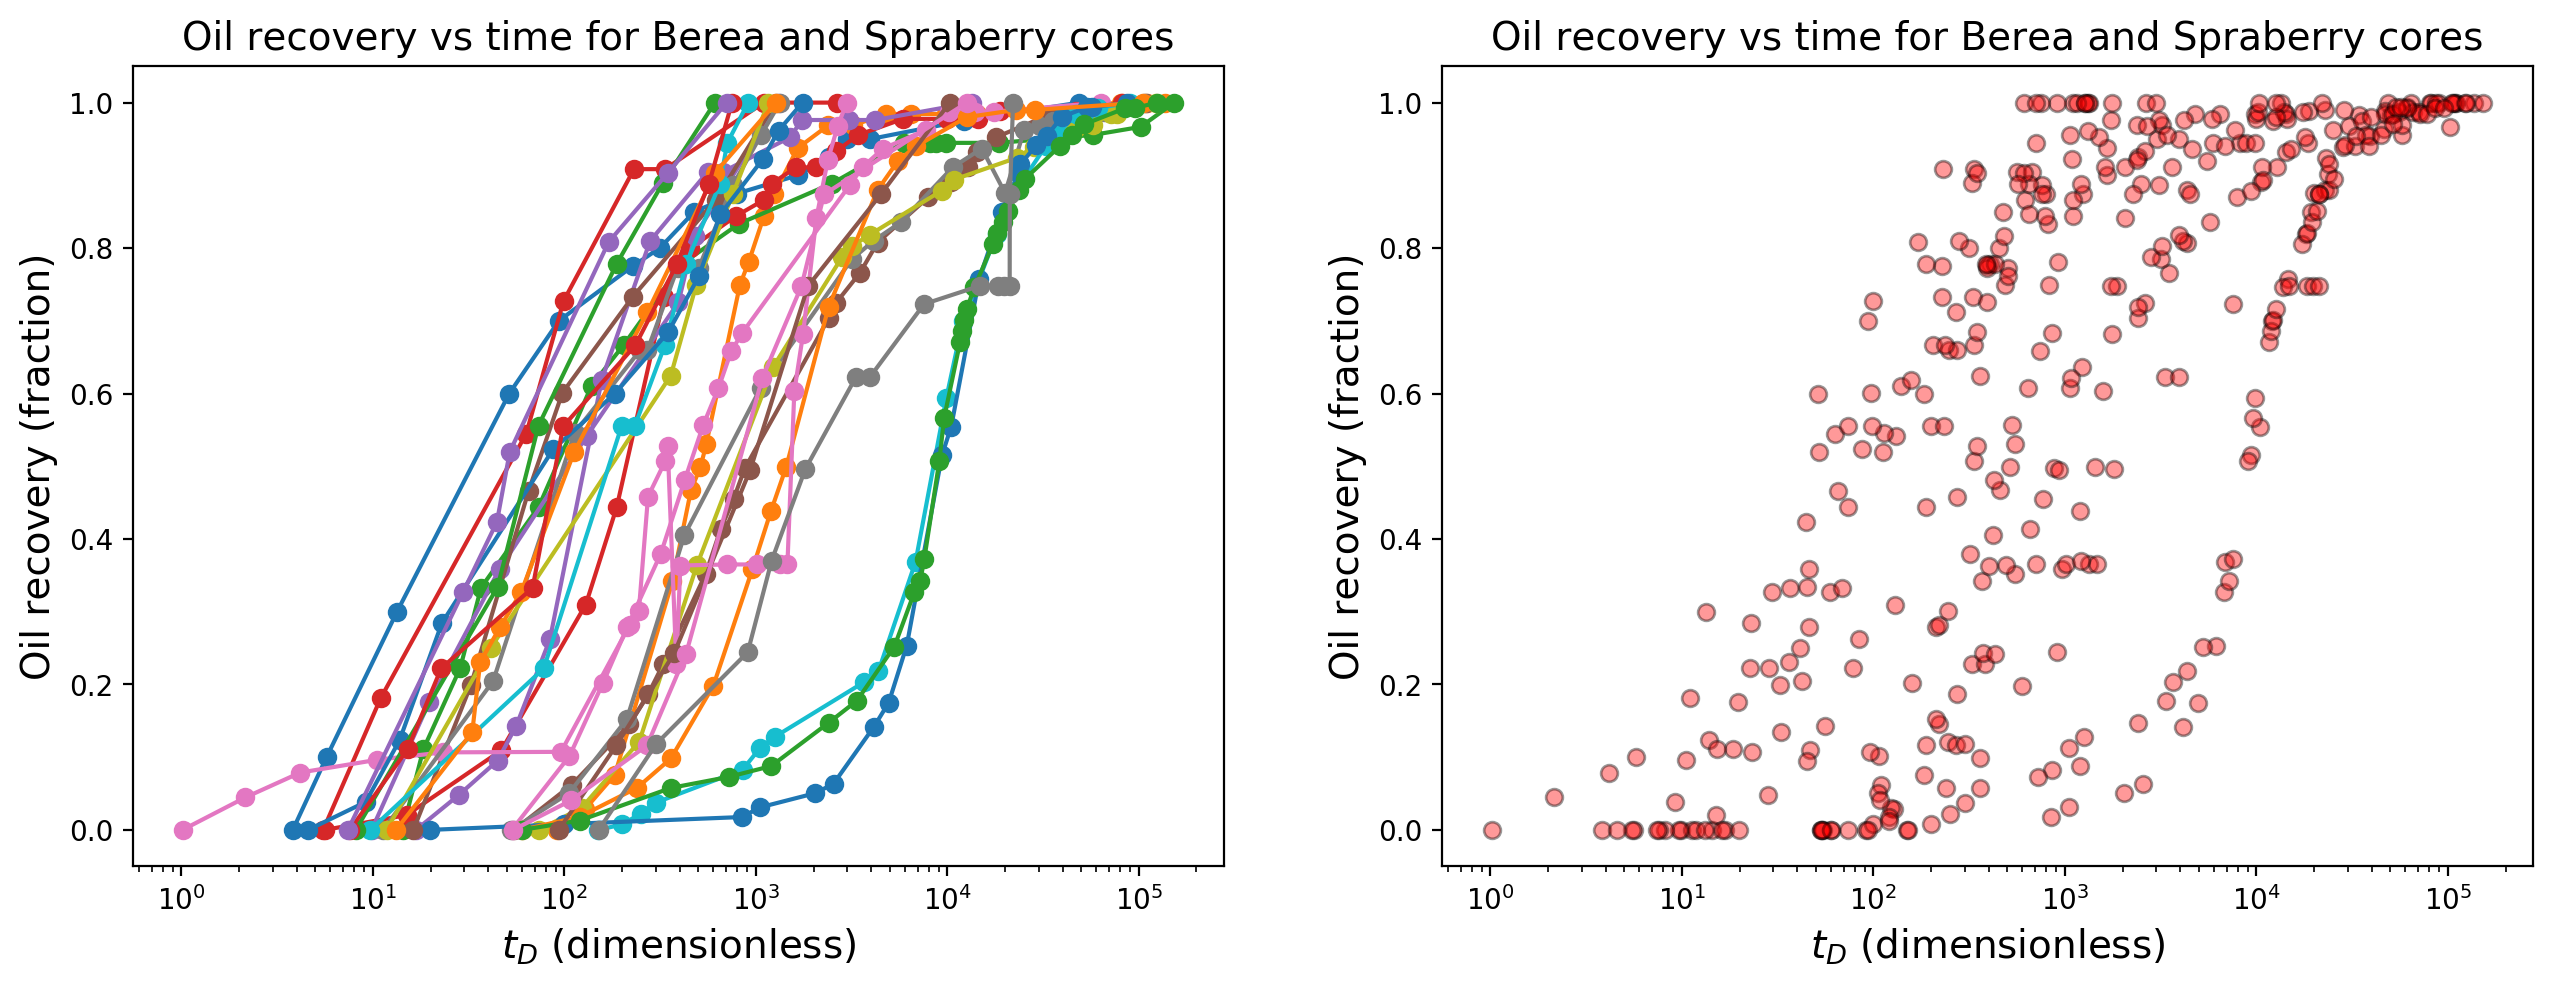

In [16]:
plt.figure(dpi=200)

#Oil recovery for both Berea and Spraberry cores using each single data-------
plt.subplot(121)
for i in range (0,13):
    plt.semilogx(sample.iloc[:,2*i],sample.iloc[:,2*i+1],'-o')  
for i in range (13,28):
    plt.semilogx(sample.iloc[:,2*i],sample.iloc[:,2*i+1],'-o')  
plt.title('Oil recovery vs time for Berea and Spraberry cores', fontsize=14)
plt.xlabel('$t_D$ (dimensionless)', fontsize=14)
plt.ylabel('Oil recovery (fraction)', fontsize=14)    

#Oil recovery for both Berea and Spraberry cores using the general grouping---    
plt.subplot(122)
plt.semilogx(t,r,'bo', color = 'red', alpha = 0.4, markeredgecolor = 'black')
plt.title('Oil recovery vs time for Berea and Spraberry cores', fontsize=14)
plt.xlabel('$t_D$ (dimensionless)', fontsize=14)
plt.ylabel('Oil recovery (fraction)', fontsize=14)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3)
plt.show()

<span style="color:blue">**Remarks:**</span> 
   * After the transformation we observe a trend in the results: the characteristic S-shaped form
   * We have transformed the 28 datapairs (each with different length) into only two general features
   * Comparison of the original datapairs (left) and the grouped time and recovery (right) shows the process was correctly made
   * The data shown on the left will enable an efficient data processing considering the individual information of the 28 samples into two features.

Finally, we assign $t$ and $r$ into a new dataframe, and calculate the log of time to facilitate the manage of the data for the calculations. In additon, we make a deep copy of our dataframe to use it in the Spectral clustering method discussed later 

In [17]:
df = pd.DataFrame({'time': t.iloc[:,0], 'recovery': r.iloc[:,0]}) # make a new DataFrame from the vectors t and r
df['tlog']=np.log10(df['time'])           #add a new column containing the log of the time feature
dfnew=df.copy()

### Clustering 

We have correctly merged the data of each of the cores samples into only two general features containing the information of oil recovery and corresponding time for all core without mixing the information. This was a required step since we have to analize the complete data set to apply clustering methods to approximate the early and late time recovery behavior.

Here, we will do the following tasks:

* Use k-means clustering and Spectral clustering to form two groups for early and late behaviors
* Define a threshold of oil recovery condition 


Conventional approaches use semi-analytical solutions to model oil recovery based on results at early behavior as shown below (Abd, A. S., Elhafyan, E., Siddiqui, A. R. et al.: A Review of the Phenomenon of Counter-Current Spontaneous Imbibition: Analysis and Data Interpretation. Journal of Petroleum Science and Engineering 180: 456-470 (2019)). Here it is observed that the model ignores the data at late times, which could cause wrong estimates.


<div>
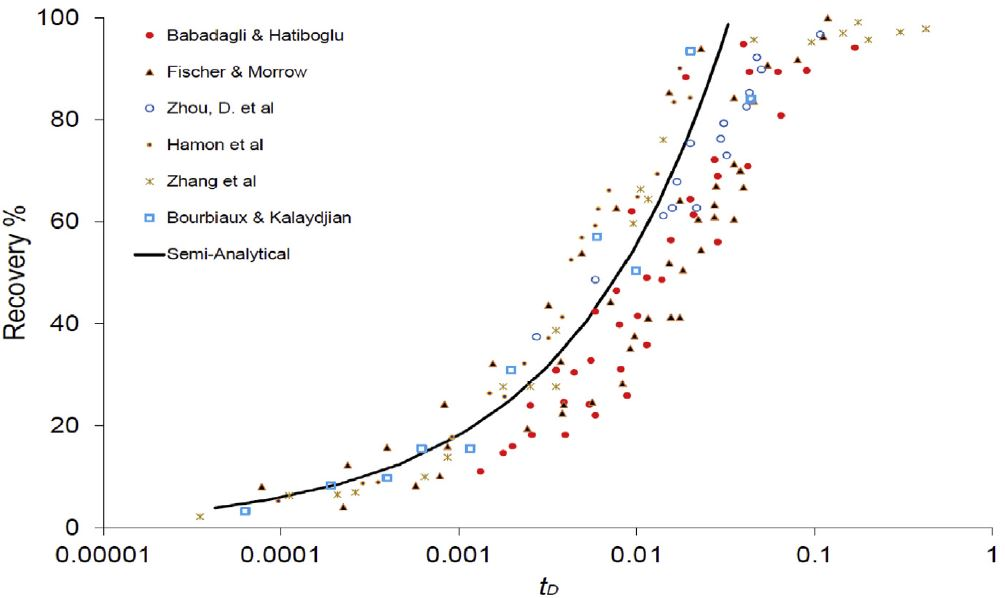
</div>

The semi-analytical model presented ignores the late-time behavior (S-shaped form) resulting in a limited model to determine the potential of imbibition as a recovery mechanism. Therefore, it is needded to obtain a more general solution.

#### K-means clustering

The first method to use is K-means clustering to determine if it is possible to obtain a correct split of the data into two groups at early and late behaviors. The reason to use this clustering method is because of the evident concave form at early behavior and convex form at late behavior, which are characteristics of the S-shaped form from imbibition recovery data. The data preparation and use of K-means method is shown in the following lines: 

In [18]:
timemin = df['tlog'].min()    #minimum time in the "tlog" column in the data frame df
timemax = df['tlog'].max()    #maximum time in the "tlog" column in the data frame df 
recmin = df['recovery'].min() #minimim recovery in the "recovery" column in the data frame df
recmax = df['recovery'].max() #maximum recovery in the "recovery" column in the data frame df

df['Norm_time']=(df['tlog']-timemin)/(timemax - timemin)       #Normalization of the data in the "tlog" column
df['Norm_recovery']=(df['recovery']-recmin)/(recmax - recmin)  #Normalization of the data in the "recovery" column

time_min = -2; time_max = 8            #set of the limits for time
rec_min = 0; rec_max = 1               #set of the limits for recovery
np.random.seed(20)                     #initial random seed
K = 2                                  #number of prototypes (only two)
colmap = {1: 'r', 2: 'g'}              #assigment of colors for the clusters

#clustering using K-means-----------------------------------------------------
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_

#### Spectral clustering

The reason to use this clustering method is because it has an excellent quality under many different forms, particularly for convex and concave shapes. We look to separate the data into early and late behaviors to later use a more accurate scaling of time $t_{De}$. We investigate the use of this method to determine its ability to deal with the characteristic S-shaped form from the imbibition recovery data in addition to K-means to have a comparison.

The following code blocks are from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_Clustering.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb), making appropriate changes for our problem to examine. The data preparation and use of the Spectral method is shown in the following lines:

In [19]:
cmap = plt.cm.inferno           #function to assign color to the data in the scatter plots
col = ['tlog','recovery']       #assignment of the columns
xlim = [-2,6]                   #set of the limits for time in the x axis
ylim = [0,1]                    #set of the limits for recovery in the y axis
dfnew = dfnew[[col[0],col[1]]]  #assignment of the data to the datareame dfnew by column

transform = MinMaxScaler(); 
features = [col[0],col[1]]

#Here we define the function "transform" which is a scaler for the data. 
#Furthemore, we standardize the data features as follows ---------------------

# standardize the data features to mean = 0, var = 1.0
dfnew['n' + col[0]] = transform.fit_transform(df.loc[:,features].values)[:,0]
# standardize the data features to mean = 0, var = 1.0
dfnew['n' + col[1]] = transform.fit_transform(df.loc[:,features].values)[:,1] 

#clustering using Spectral method---------------------------------------------
spectral = SpectralClustering(n_clusters=2,assign_labels="kmeans",affinity = 'rbf',
                              gamma = 10,n_neighbors = 200,random_state=230).fit(dfnew[['n' + col[0],'n' + col[1]]].values)
dfnew['SPECTRAL'] = spectral.labels_ + 1
cmap = plt.cm.spring

To compare the performance of both K-means and Spectral clustering to approximately form two clusters at early and late recovery behaviors we plot and compared the results.
* The results obtained with k-means clustering and Spectral clustering show an accurate split of the data into two groups for early and late times based on the $t_D$ normalized and the characterisitic S-shaped form of the data.

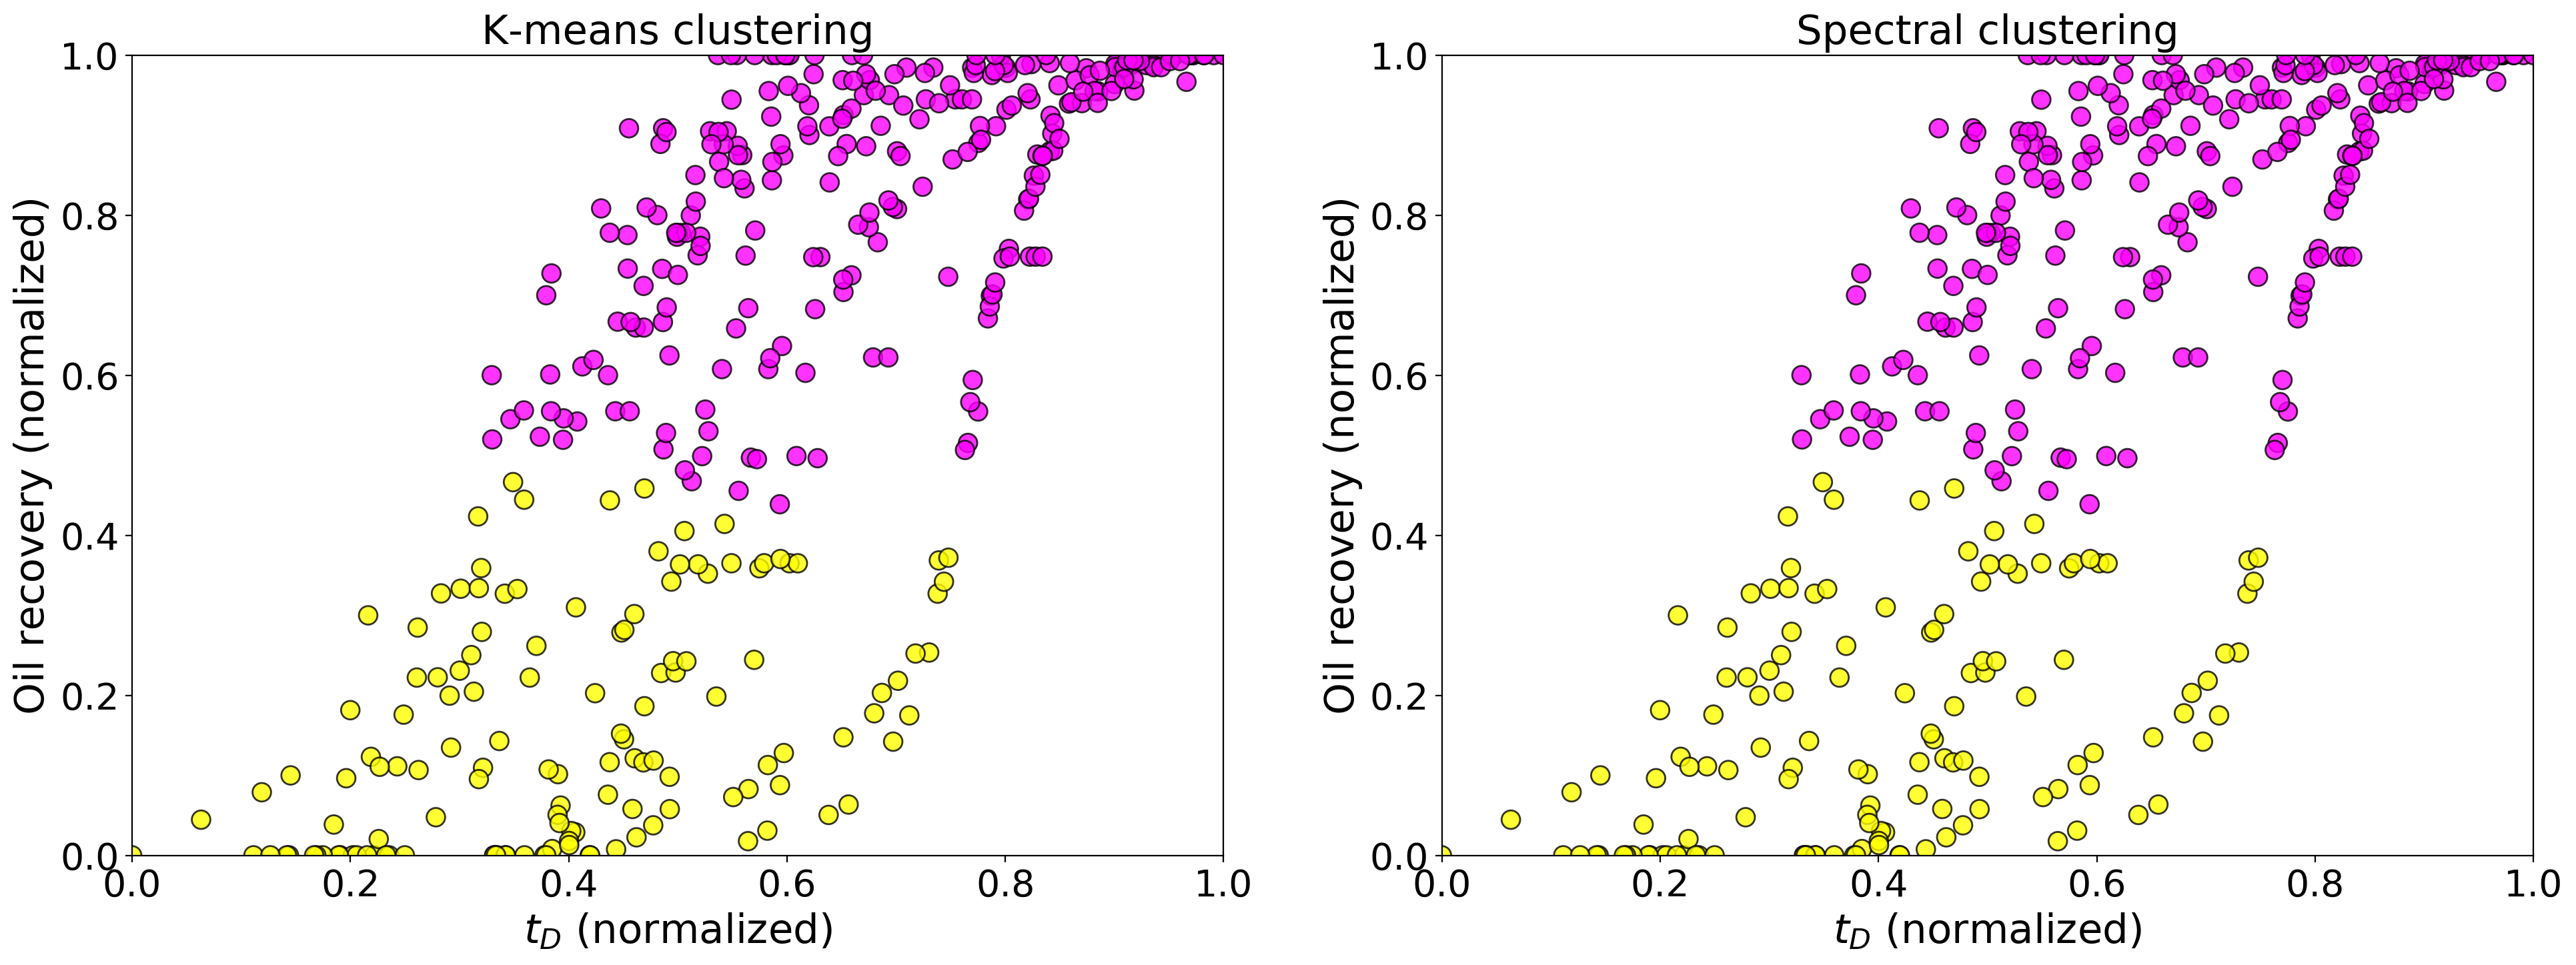

In [20]:
plt.figure(dpi=200)
#Plot for K-means clustering--------------------------------------------------
plt.subplot(121) 
plt.scatter(df['Norm_time'], df['Norm_recovery'], c=dfnew['SPECTRAL'], alpha = 0.8, linewidths=1.0, verts=None, edgecolors="black", cmap = cmap, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.title('K-means clustering',fontsize=22) 
plt.xlabel('$t_D$ (normalized)',fontsize=22)
plt.ylabel('Oil recovery (normalized)', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 1)
#Plot for Spectral clustering-------------------------------------------------
plt.subplot(122)        
plt.scatter(dfnew['n' + col[0]], dfnew['n' + col[1]], c=dfnew['SPECTRAL'], alpha = 0.8, linewidths=1.0, verts=None, edgecolors="black", cmap = cmap, s=100)
plt.title('Spectral clustering',fontsize=22) 
plt.xlabel('$t_D$ (normalized)',fontsize=22)
plt.ylabel('Oil recovery (normalized)', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.50, wspace=0.2, hspace=0.2)

<span style="color:blue">**Remarks:**</span> 

* K-means and Spectral clustering are efficient clustering methods to split the recovery data into early and late behaviors, which enables to define an approximated oil recovery threshold, in our case equal to 0.5 for the experimental data used. 
* It is observed from the above plots that there is no difference between the clustering methods to form two groups, which demonstrates the ability of these methods when used for recovery data from imbibition experiments that present a particulat S-shaped form

### Analiysis of data at early times

Although the previos use of the scaling time $t_D$ enabled the approximate estimate of the threshold recovery, it is required to perform a futher analysis to have a more compact or narrower data distribution before bulding a predictive model. 

* The data still shows a large variance, which could cause to build a poor model
* Other approaches have been derived to collapse the data onto a more compact distribution
* It has been shown that the use of the scaling time $t_{De}$ provides a narrow distribution, which can be only derived once the early-behavior has been identified.

We will calculate a new dimensionless time $t_{De}$ using the threshold of 0.5 previously defined with the help of $t_D$, in this section we will performe the following tasks:

1. Use the data at early behavior for each core sample to obtain a linear model for oil recovery $R$
2. Estimate the slope for each case
3. Apply the slope to the new definition of scaling time $t_{De}$ shown below
4. Verify the data collapse onto a more compact S-shaped curve 

The modeling of oil recovery at early behavior follows the form:
\begin{equation}
R= \frac {2 \times A \times \sqrt{t}}{\phi \times L_c}
\end{equation}

where
\begin{equation}
slope=\frac {2 \times A }{\phi \times L_c}\\
A \; \text{is an imbibition constant for oil recovery at early times expressed in units of $\frac{cm}{\sqrt{hour}}$ } \\
\end{equation}

The dimensionless term for early times is expreseed as follows (Abd, A. S., Elhafyan, E., Siddiqui, A. R. et al.: A Review of the Phenomenon of Counter-Current Spontaneous Imbibition: Analysis and Data Interpretation. Journal of Petroleum Science and Engineering 180: 456-470 (2019):

\begin{equation}
t_{De}= \left[\frac {2 \times A}{\phi \times L_c}\right]^2 \times t =(slope)^2 \times t
\end{equation}

To perform the analsys of recovery at early behavior we will storage the information corresponding to oil recovery less than 0.5 (oil recovey threshold obtained using $t_{D}$). Here we use an if statement to define the values below 0.5 in oil recovery, which will be assigned as early data for the calculation of the slope

In [21]:
#Dataframe to storage the information at early behavior based on oil recovery threshold: R<0.5
data_early=data.copy()

#if statement to define the data considered as early behavior for each Berea and Spraberry core
for j in range (0,28):
    for i in range (0,30):
        if data_early.iloc[i,2*j+1]>0.5 or data_early.iloc[i,2*j+1]==-1 :
            data_early.iloc[i,2*j]=np.nan
            data_early.iloc[i,2*j+1]=np.nan
            
data_early =data_early.fillna(0)     #we set zeros where we have missing values due to the length of the dataframe               
data_early.head(n=4)             

tb1        B1         tb2        B2        tb3        B3         tb4  \
0   3.817813  0.000000   91.724005  0.000000  14.285457  0.000000    5.624802   
1   5.726720  0.099882  128.413607  0.028743  18.367016  0.111227   14.999473   
2  13.362347  0.299882  183.448009  0.075777  28.570914  0.222454   46.873353   
3   0.000000  0.000000  366.896019  0.342043  36.734033  0.333159  129.370454   

         B4        tb5        B5  ...       ts11       S11       ts12  \
0  0.000000  16.799785  0.000000  ...   7.581912  0.000000   7.406378   
1  0.020325  27.999642  0.047619  ...  15.163823  0.110642  29.625513   
2  0.109387  44.799426  0.095238  ...  22.745735  0.222128  44.438269   
3  0.309867  55.999283  0.142857  ...  68.237205  0.332770   0.000000   

        S12        ts13       S13        ts14       S14         ts15       S15  
0  0.000000   93.499433  0.000000   54.045199  0.000000   151.126136  0.000000  
1  0.327287  186.998865  0.116384  108.090398  0.040404   302.252272  0.118416  
2  0.423502  373.997731  0.242615  270.225994  0.116162   906.756816  0.244313  
3  0.000000  934.994327  0.495077  432.361590  0.242424  1209.009089  0.370286  

[4 rows x 56 columns]

* To determine the slope we first calculate the square root of time for all core samples and then we use linear regression to model recovery below 0.5 defined above.
* Here we calculate the slope of each dataset of time vs oil recovery for each core sample. 
* Once we have the slope for each core sample, we calculate the dimensionless time $t_{De}$ 

In [22]:
m=np.zeros(28)
#First step: calculation of the square root-----------------------------------
for j in range (0,28):
    data_early.iloc[:,2*j]=(data_early.iloc[:,2*j])**0.5  
    
# Second step:linear regression function-------------------------------------- 
for j in range (0,28):
    slope, intercept, r_value, p_value, std_err = st.linregress(data_early.iloc[:,2*j],data_early.iloc[:,2*j+1])
    m[j]=slope
    
#Third step: loop for scaling of oil recovery and calculation of $t_De$ based on the new definition
for i in range (0,28):    
    data_ori.iloc[:,2*i+1]=(data_ori.iloc[:,2*i+1]-np.min(data_ori.iloc[:,2*i+1]))/(np.amax(data_ori.iloc[:,2*i+1])-np.min(data_ori.iloc[:,2*i+1])) 
    data_ori.iloc[:,2*i]=np.log10(data.iloc[:,2*i]*m[i]**2)

C:\Users\dark_\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Once the slope is determined for each core we proceed to do a new scaling process using the definition of $t_{De}$ shown above. Here we conduct the following tasks to have an improved, more compact distribution of recovery for all cores examined:


1. Replace NaN values in columns with data less than the max lenght 
2. Grouping of data of each core into only two general variables
3. Asignment of data into a new dataframe
4. Normalization of data 

In [23]:
#1. Replace NaN values in columns with data less than the max lenght----------
data_ori =data_ori.fillna(-1)

#2. Grouping of data of each core in only two unique variables----------------
zeros=data_ori.iloc[0:0,1]
r_ori=pd.DataFrame(zeros.values) #dataframe for recovery data 
t_ori=pd.DataFrame(zeros.values) #dataframa for time data 

#loop for grouping the time and recovery data into two general features
for j in range (0,28):    
    n=0                                                    
    for i in range (0,30):
        #if statement to identify the lenght of each column
        if (data_ori.iloc[i,2*j]>-1 or data_ori.iloc[i,2*j]==1):   
            n=n+1                                          
                        
    x=data_ori.iloc[:n,2*j]     #assignment of each time column to a temporal variable
    y=data_ori.iloc[:n,2*j+1]   #assignment of each recovery column to a temporal variable 
        
    z=pd.DataFrame(y.values)  #temporal dataframe for recovery data of each core 
    w=pd.DataFrame(x.values)  #temporal dataframe for time data of each core 
            
    r_ori=r_ori.append(z,ignore_index = True)  #storage for recovery data of each core
    t_ori=t_ori.append(w,ignore_index = True)  #storage for time data of each core 
    
#3. Asignment of data into a new dataframe------------------------------------   
# make a new DataFrame from the vectors t_ori and r_ori
df_ori = pd.DataFrame({'logtime': t_ori.iloc[:,0], 'recovery': r_ori.iloc[:,0]}) 

#4. Normalization of data----------------------------------------------------- 
timemin = df_ori['logtime'].min()    #minimum time in "tlog" 
timemax = df_ori['logtime'].max()    #maximum time in "tlog"  
recmin = df_ori['recovery'].min()    #minimim recovery in "recovery" 
recmax = df_ori['recovery'].max()    #maximum recovery in "recovery" 

df_ori['Norm_time']=(df_ori['logtime']-timemin)/(timemax - timemin)   #Normalization of time
df_ori['Norm_recovery']=(df_ori['recovery']-recmin)/(recmax - recmin) #Normalization of recovery

Comparison of models. Here we show the plots for the conventional approach of $t_D$ and the modified approach as a function of $t_{De}$

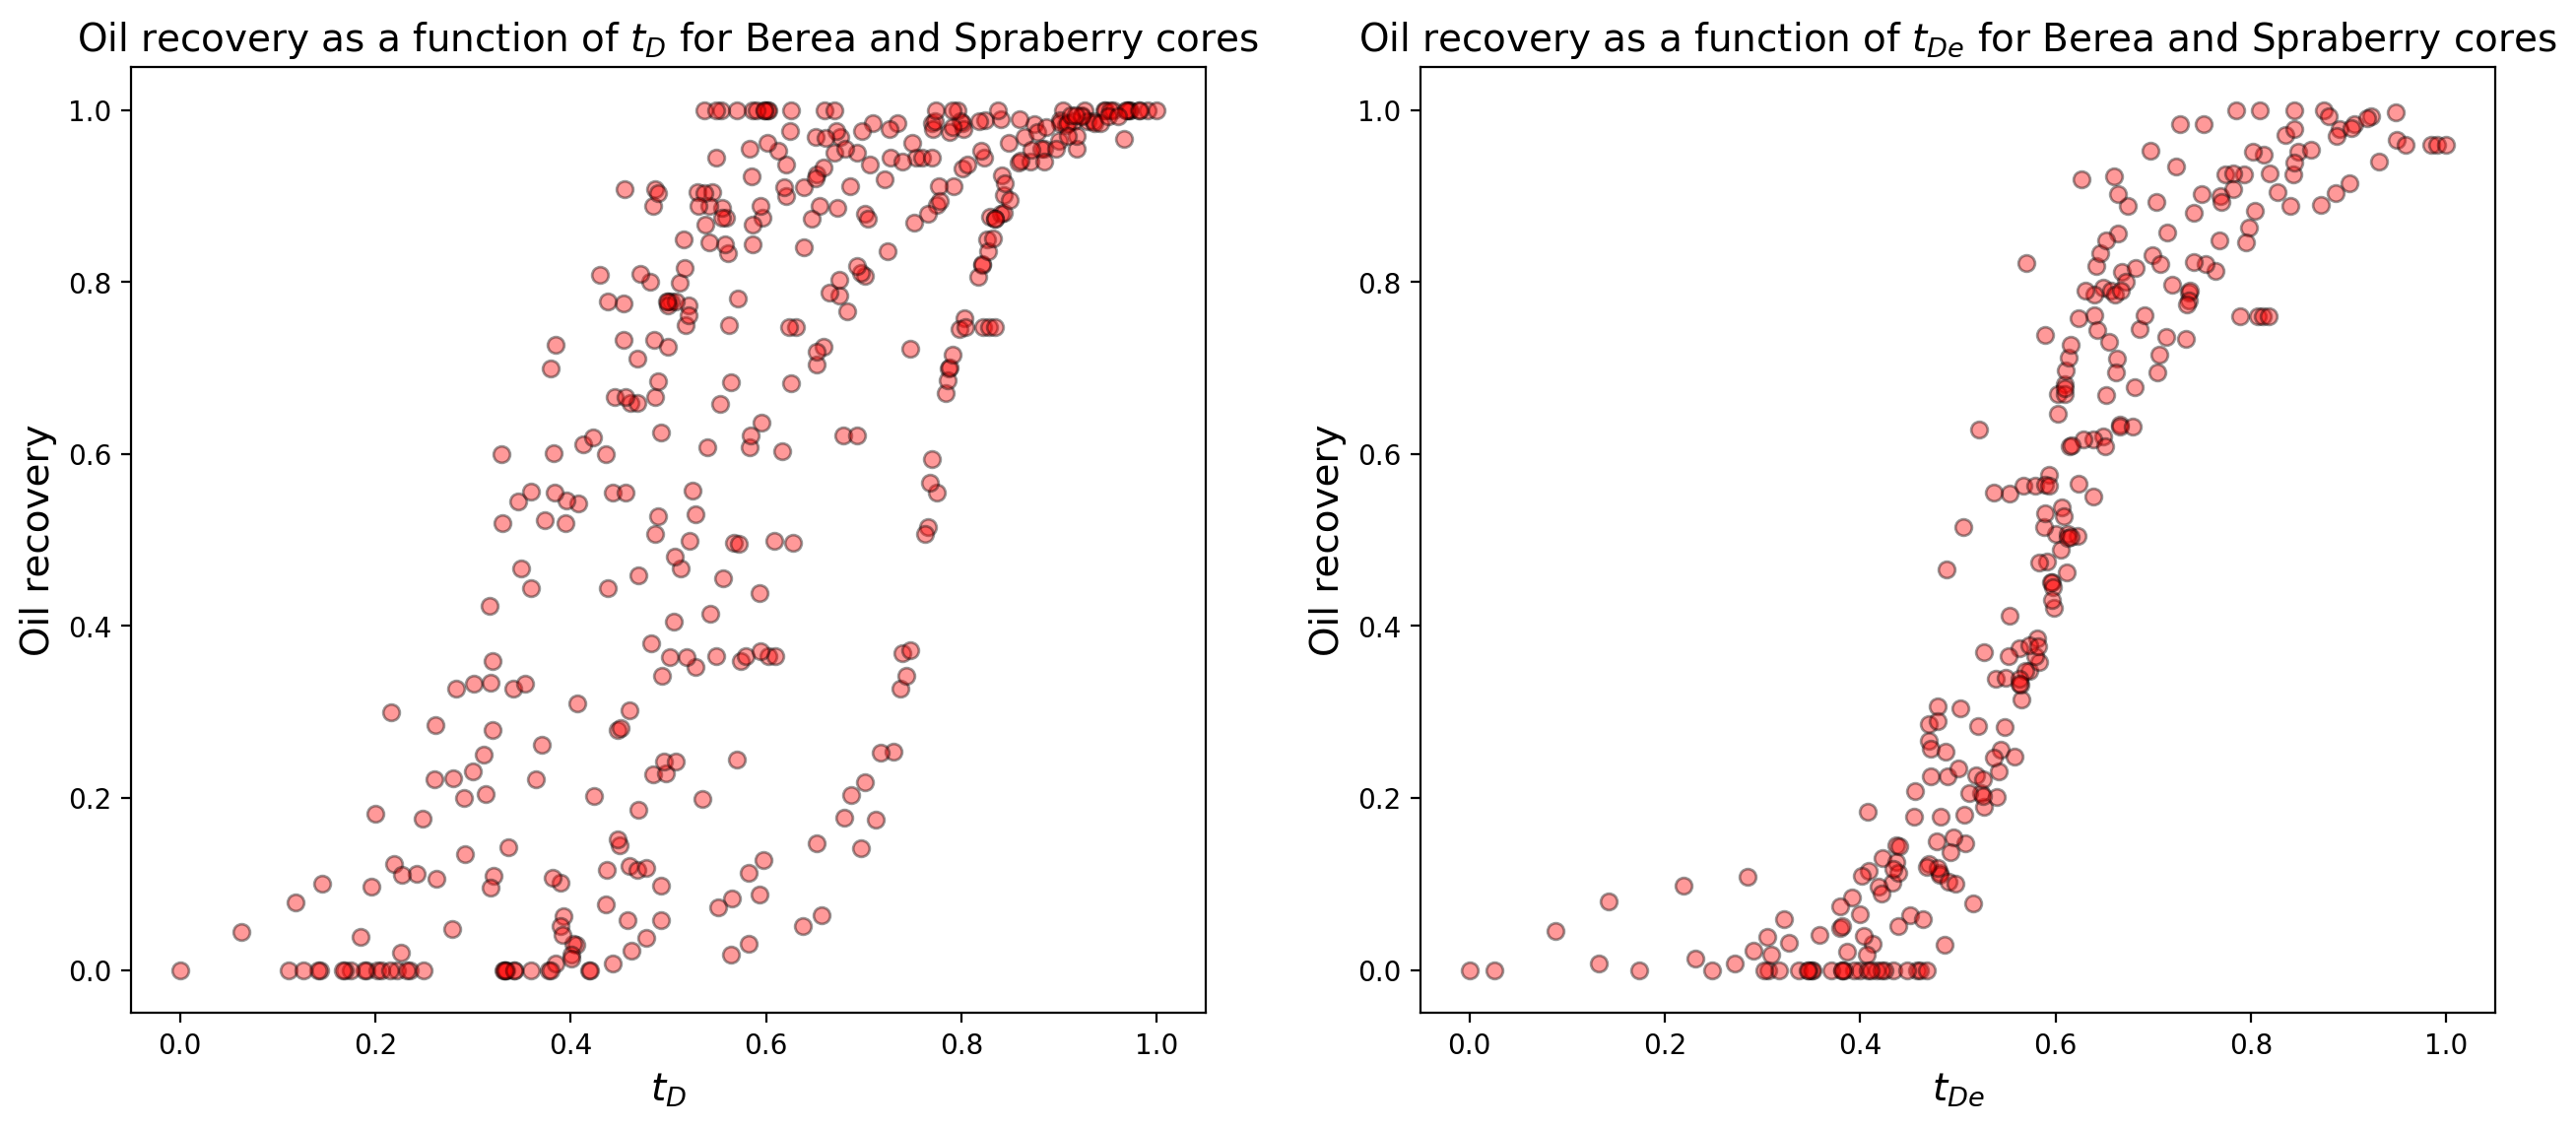

In [24]:
plt.figure(dpi=200)

plt.subplot(121)
plt.plot(df['Norm_time'], df['Norm_recovery'],'bo', color = 'red', alpha = 0.4, markeredgecolor = 'black')
plt.title('Oil recovery as a function of $t_{D}$ for Berea and Spraberry cores',fontsize=14)
plt.xlabel('$t_D$', fontsize=14)
plt.ylabel('Oil recovery', fontsize=14)
 
plt.subplot(122)
plt.plot(df_ori["Norm_time"],df_ori["Norm_recovery"],'o', color = 'red', alpha = 0.4, markeredgecolor = 'black')
plt.title('Oil recovery as a function of $t_{De}$ for Berea and Spraberry cores', fontsize=14)
plt.xlabel('$t_{De}$', fontsize=14)
plt.ylabel('Oil recovery', fontsize=14)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

<span style="color:blue">**Remarks:**</span> 
   * The scaling time $t_{De}$ results in a narrower distribution of the recovery data compared to the conventional use of $t_{D}$
   * It is observed a clearly S-shaped form, which justifies the additional processing performed 
   * The variance in the model is reduced, which will benefit the building of a more accurate model
   * $t_{De}$ demonstrates to be a powerful scaling derived from early behavior but that can be extended for late behavior 

## Predictive model

Here we will build a predictive model to estimate oil recovery as a function of time formulating a general solution that can be used at early and late behaviors. Based on the final compact distribution obtained as a function of $t_{De}$ we will build a polynomial model and exponential model to examine the ability of predicting recovery for experimental imbibition data showing a characteristic S-shaped form.

### Polynomial model

We will first build a Hermite polynomial regression model to estimate oil recovery of the compact distribution obtained with the use of $t_{De}$ and normalization of $R$. Here we will examine if a polynomial model can correctly model the S-shaped form conducting the following steps:

1. Normalize the data
2. Define X and y as the general features to use in our model
3. Random split of the data into training and testing
4. Build a Hermite polynomial model to estimate oil recovery


In [25]:
#1. Normalize the data--------------------------------------------------------
dmodel= pd.DataFrame()   
dmodel['Norm_time'], tvtime, tnstime = geostats.nscore(df_ori, 'Norm_time') # nscore transform for time tDe
dmodel['Norm_recovery'], tvrec, tnsrec = geostats.nscore(df_ori, 'Norm_recovery')  # nscore transform for recovery

#2. Define X and y as the general features to use on our model-------------------
X = dmodel[['Norm_time']]                           
y = dmodel[['Norm_recovery']] 

#3. Random split of the data into training and testing data----------------------
testing_data=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_data, random_state=420) 

Here it is shown the iterative process of hyperparameter tuning by testing mean square error over polynomial order to find the correct polynomial order. The following code blocks are from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_PolygonalRegression.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb), making appropriate changes for our problem to examine

In [26]:
#4. Build Hermite polynomial
order=np.arange(50)
mse_train = np.zeros(len(order)); 
mse_test = np.zeros(len(order)); 

for i in range (0,len(order),1):        
    ai_ns_hermiteO = scipy.special.eval_hermitenorm(order[0:i+1], X_train.values.reshape(-1,1), out=None)  
    lin_hermO = LinearRegression()     
    lin_hermO.fit(ai_ns_hermiteO[:,0:i+1], y_train)    
    rec_pred=lin_hermO.predict(scipy.special.eval_hermitenorm(order[0:i+1], X_train.values.reshape(-1,1), out=None))
    mse_train[i] = mean_squared_error(y_train, rec_pred)
        
    rec_predt=lin_hermO.predict(scipy.special.eval_hermitenorm(order[0:i+1], X_test.values.reshape(-1,1), out=None))
    mse_test[i] = mean_squared_error(y_test, rec_predt)         
    
#Estimate of polynomial order based on minimum value of MSE in testing    
Min_pol=order[np.argmin(mse_test)]   

It is shown the plot of MSE for both training and testing data. The complexity of the model is selected based on testing data. The results show that after an order greater than 10 the MSE abruptely increases, which is variable behavior that results from the random selection of the traing and testing data and the split ratio.

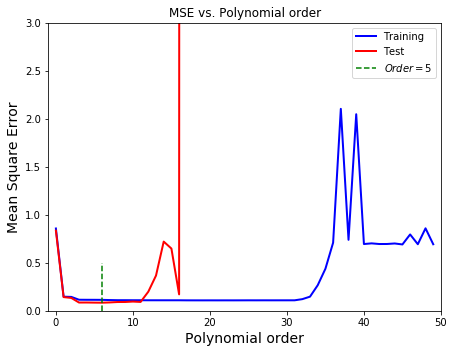

In [27]:
#data to plot a vertical line at max value of testing data for variance explained
ex=np.zeros(2)
ey=np.zeros(2)
ex[0]=Min_pol
ex[1]=Min_pol
ey[0]=0.0
ey[1]=0.5

#Plot to visualise MSE for both the training and testing data
plt.subplot(122)
plt.plot(order, mse_train,  color='blue', linewidth = 2, label = 'Training')
plt.plot(order, mse_test,  color='red', linewidth = 2, label = 'Test')
plt.title('MSE vs. Polynomial order')
plt.xlabel('Polynomial order', fontsize=14)
plt.ylabel('Mean Square Error', fontsize=14)
plt.xlim(-1,50)
plt.ylim(0,3.0)
plt.plot(ex,ey,'g--',label='$Order=${0:1.0f}'.format(Min_pol-1))
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_PolygonalRegression.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb), making appropriate changes for our problem to examine

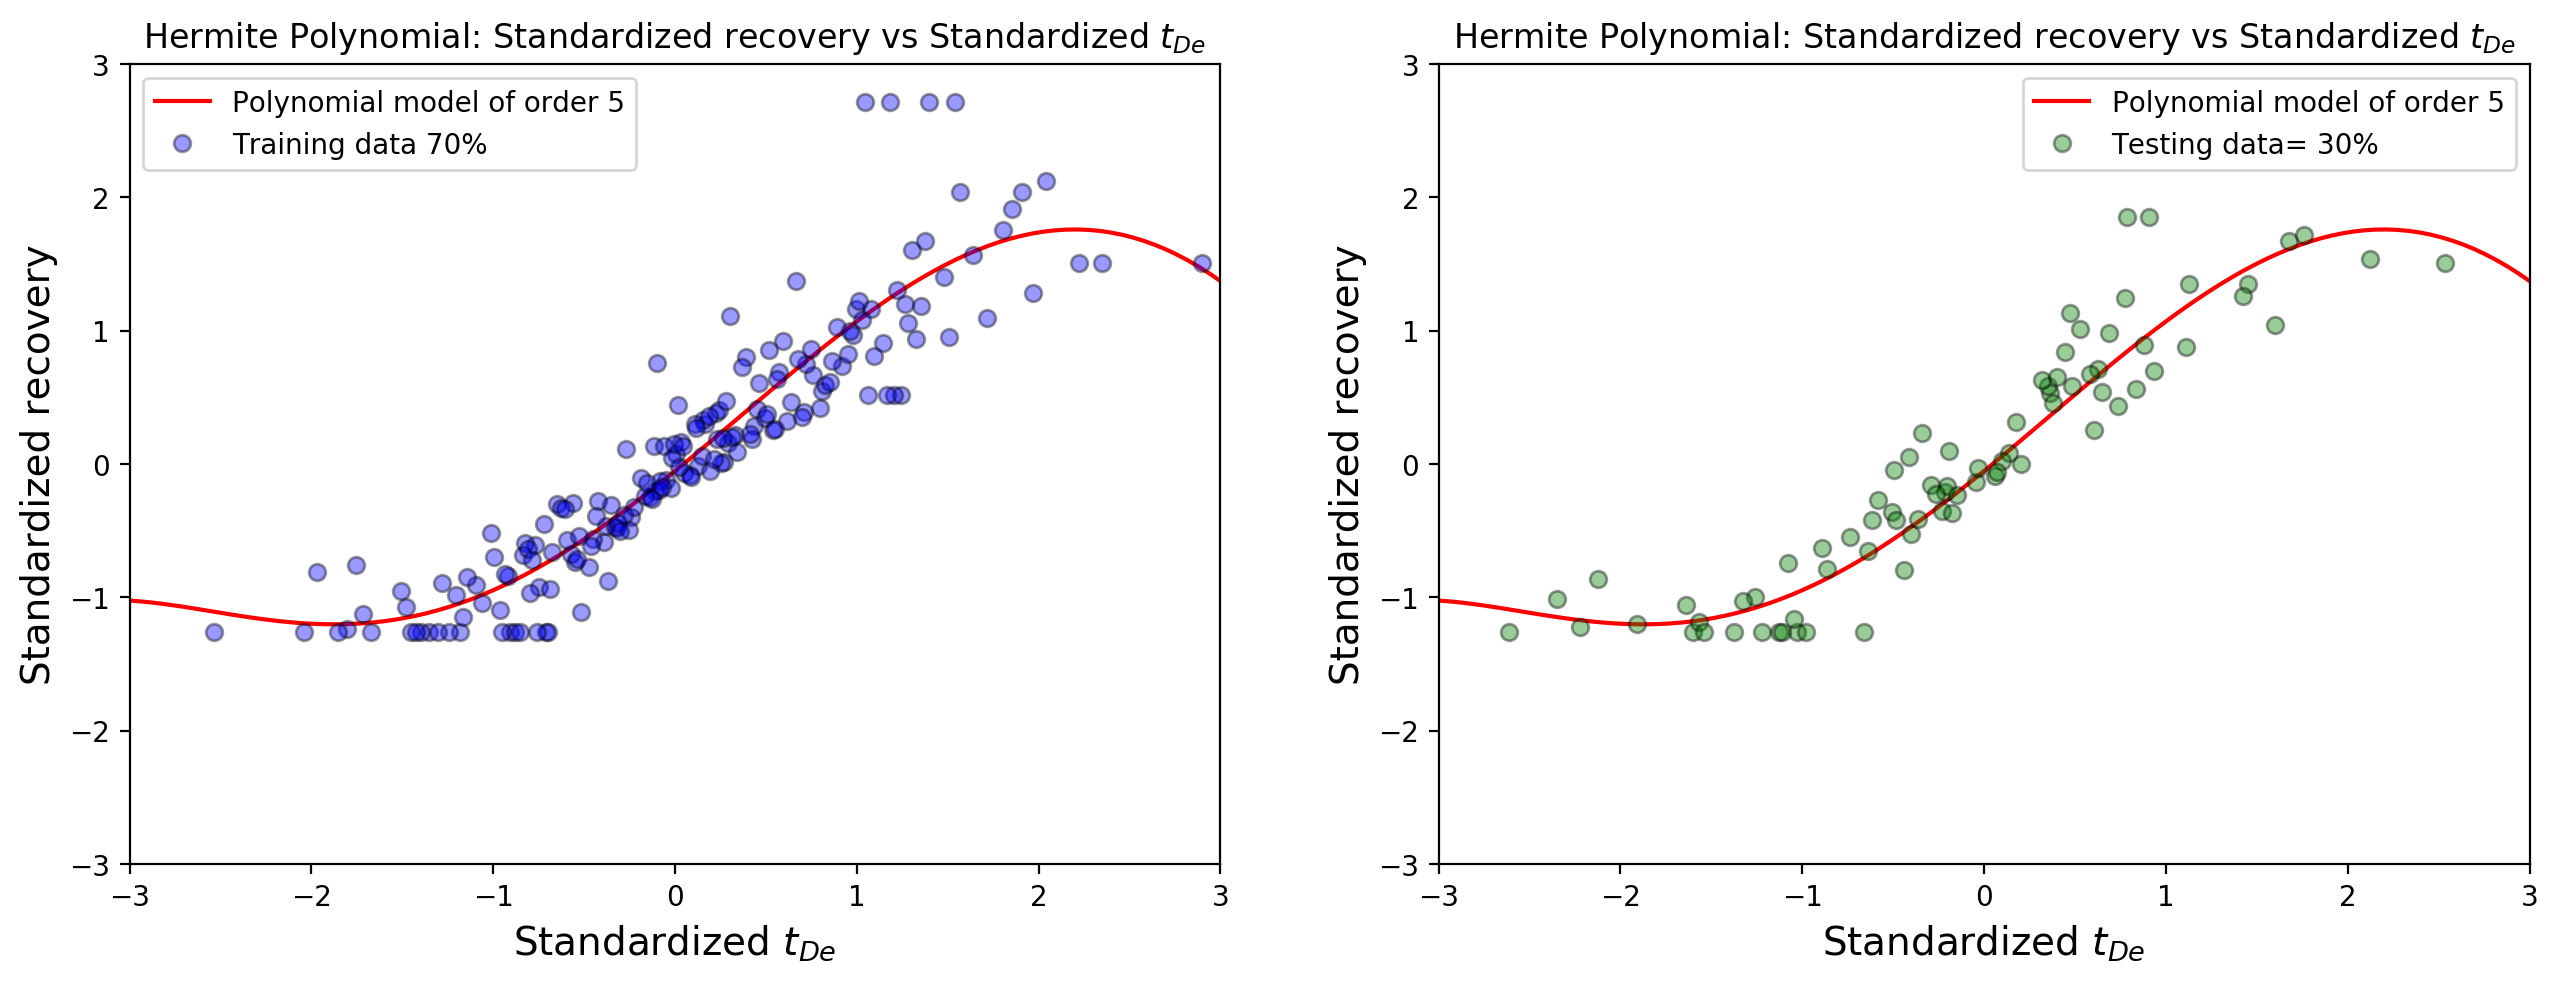

In [28]:
plt.figure(dpi=200)

#Calculation of the tuned Hermite polynomial as a function of the polynomial order
time_x = np.linspace(-3.0,3.0,100)
orders4 =np.arange(Min_pol)                 #tuned polynomial order
ai_ns_hermite4 = scipy.special.eval_hermitenorm(orders4, X_train.values.reshape(-1, 1), out=None)
lin_herm4 = LinearRegression() 
lin_herm4.fit(ai_ns_hermite4[:,0:], y_train) 

#Plot to visualize the training data used and the perfromance of the polynomial model built
plt.subplot(121)
plt.plot(time_x, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4, time_x.reshape(-1, 1), out=None)),  label='Polynomial model of order {0:1.0f}'.format(Min_pol-1),color = 'red') 
plt.plot(X_train, y_train, 'o', label='Training data {0:1.0f}'.format((1-testing_data)*100)+str('%'), color = 'blue', alpha = 0.4, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Standardized recovery vs Standardized $t_{De}$')
plt.xlabel('Standardized $t_{De}$', fontsize=14)
plt.ylabel('Standardized recovery', fontsize=14)
plt.xlim(-3,3); plt.ylim(-3,3)
plt.legend()

#Plot to visualize the testinga data and the performance of the polynomial model built
plt.subplot(122)
plt.plot(time_x, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4, time_x.reshape(-1, 1), out=None)), label='Polynomial model of order {0:1.0f}'.format(Min_pol-1),color = 'red') 
plt.plot(X_test, y_test, 'o', label='Testing data= {0:1.0f}'.format(testing_data*100)+str('%'), color = 'green', alpha = 0.4, markeredgecolor = 'black')
plt.title('Hermite Polynomial: Standardized recovery vs Standardized $t_{De}$')
plt.xlabel('Standardized $t_{De}$', fontsize=14)
plt.ylabel('Standardized recovery', fontsize=14)
plt.xlim(-3,3); plt.ylim(-3,3)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

<span style="color:blue">**Conclusions and remarks:**</span> 
* The Hermite polynomial model shows a good performance to estimate oil recovery
* Although not shown here, the polynomial model varies significantly when using a different random training-testing data, and a different training-testing ratio (it can be easily done changing the values in the first code block above in this section).
* The high polynomial order limits the ability of the model to make accurate predictions for extrapolation since a polynomial model is unstable and too sensitive to the training data. 
* It is observed that at low values of $t_{De}$ the polynomial model presents a light curvature indicating that recovery does not initiate at zero, which is implausible for the real-experimental data
* The polynomial model varies from simple to complex polynomial orders with different training data (randomly selected) and split data ratio. 

### Exponential model using an approximated linear transform 

Altough the **Hermite polynomial** model obtained shows a good accuracy to model recovery, it has significant limitations:
* Poor extrapolation and large variance
* Sensitive to outliers

Therefore, we examined the use of an exponential model to estimate the characteristic S-shaped form of oil recovery as a function of time. We transformed the experimental data to an approximate linear form by using a logarithmic function to later use **Ridge regression** which provides the following advantages:

* Simple and interpretable
* Resistant to outliers
* Improved predictions with sparse data

The following steps are performed in this section to build the exponential model:

* Transform the recovery data to linear by using a logarithmic function
* Use Ridge regression 
* Conduct hyperparameter tuning by testing mean square error 
* Obtain the predictive model

The logarithmic function to use is:

\begin{equation}
R_l=log(\frac{1}{R}-1)
\end{equation}

where $R_l$ is the recovery data linearly transformed. The exponential model to predict recovery will be in the form:


\begin{equation}
R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}
\end{equation}

where the unknowns are $b_0$ and $b_1$, which are the linear model parameters. The following tasks are done to linearly transform the data to use Ridge regression:

1. Split the data into training and testing data
2. Assign the traininng and testing data to dataframes 
3. Remove values of $R$ equal to 0 and 1 before using the logarithmic function since these values cause error
4. Calculation of $R_l$ for both the training and testing data after removing of R values

In [29]:
#1. Split of data into training and testing-----------------------------------
X = df_ori[['Norm_time']]                           
y = df_ori[['Norm_recovery']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_data, random_state=420) # train and test split

#2. Assign of data in dataframes----------------------------------------------
df_line_train = pd.DataFrame({'X_train': X_train["Norm_time"], 'y_train': y_train["Norm_recovery"]}) 
df_line_test = pd.DataFrame({'X_test': X_test["Norm_time"], 'y_test': y_test["Norm_recovery"]}) 

#3. Remove values of R equal to 0 and 1---------------------------------------
# removing of recovery equal to 1 and 0 in the training data
df_line_train.drop(df_line_train[df_line_train["y_train"] == 1 ].index, inplace=True)
df_line_train.drop(df_line_train[df_line_train["y_train"] == 0 ].index, inplace=True)
# removing of recovery equal to 1 and 0 in the testing data
df_line_test.drop(df_line_test[ df_line_test["y_test"] == 1 ].index, inplace=True)
df_line_test.drop(df_line_test[ df_line_test["y_test"] == 0 ].index, inplace=True)

#4. Calculate Rl-------------------------------------------------------------- 
# Assignment of arrays for training data and calculation of Rl to faciliate the calculations
new_a_train = np.array(df_line_train["X_train"].values)
new_b_train = np.array(df_line_train["y_train"].values) 
new_b_train = np.log((1 / new_b_train) - 1)
# Assignment of arrays for testing data and calculation of Rl to facilitate the calculations
new_a_test = np.array(df_line_test["X_test"].values)
new_b_test = np.array(df_line_test["y_test"].values) 
new_b_test = np.log((1 / new_b_test) - 1)


We plot the results to verify that the logarithmic function approximatelt transfomrs the recovery data with a S-shaped form into a linear behavior.

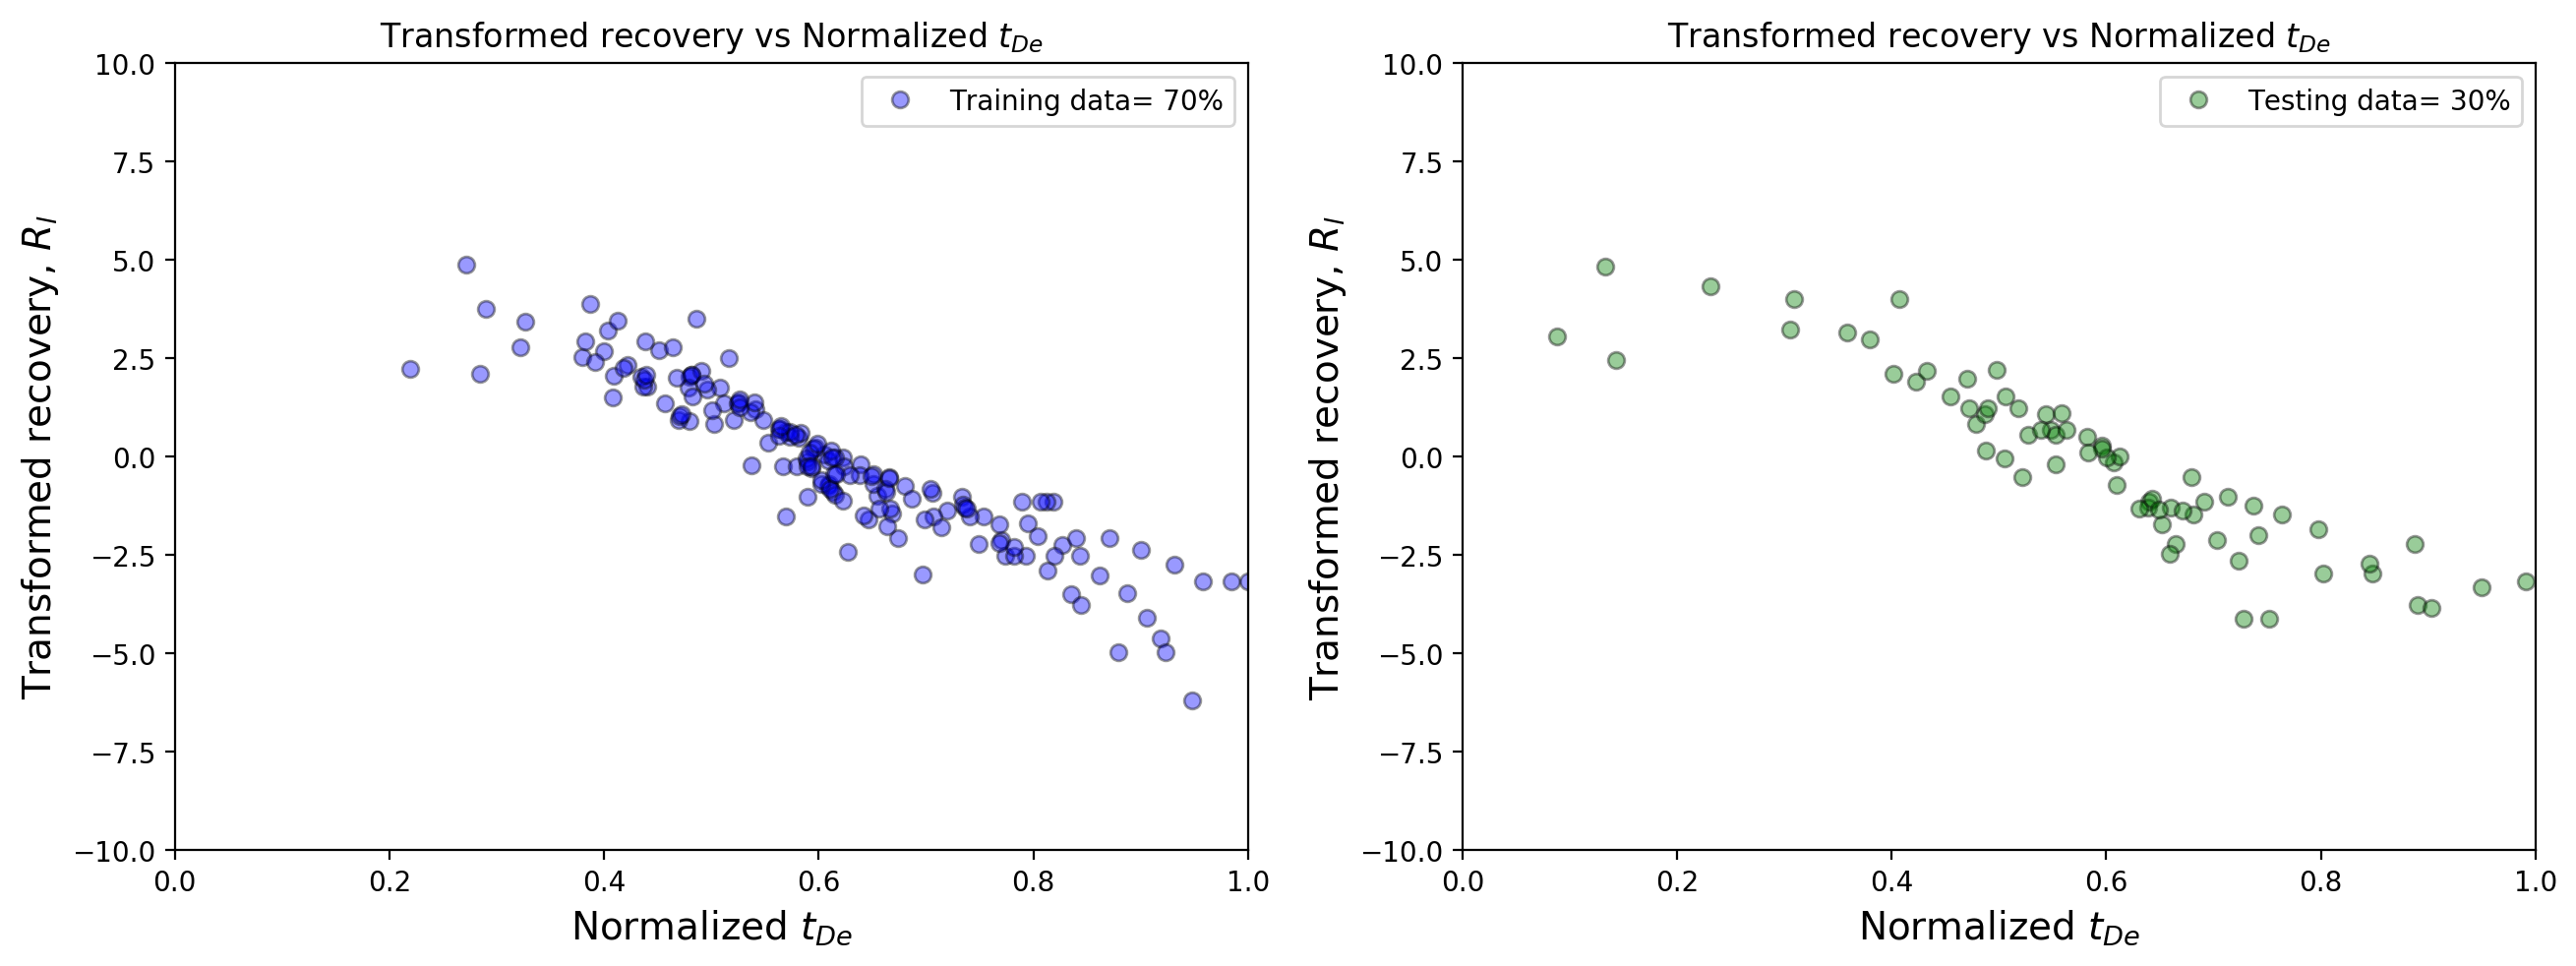

In [30]:
plt.figure(dpi=200)

#Plot of transformed recover Rl as a function of normalized tDe for training data
plt.subplot(121)
plt.plot(new_a_train, new_b_train, 'o', label='Training data= {0:1.0f}'.format((1-testing_data)*100)+str('%'), color = 'blue', alpha = 0.4, markeredgecolor = 'black')
plt.title('Transformed recovery vs Normalized $t_{De}$')
plt.xlabel('Normalized $t_{De}$', fontsize=14)
plt.ylabel('Transformed recovery, $R_l$', fontsize=14)
plt.xlim(0,1); plt.ylim(-10,10)
plt.legend()
#Plot of transformed recover Rl as a function of normalized tDe for testing data
plt.subplot(122)
plt.plot(new_a_test, new_b_test, 'o', label='Testing data= {0:1.0f}'.format(testing_data*100)+str('%'), color = 'green', alpha = 0.4, markeredgecolor = 'black')
plt.title('Transformed recovery vs Normalized $t_{De}$')
plt.xlabel('Normalized $t_{De}$', fontsize=14)
plt.ylabel('Transformed recovery, $R_l$ ', fontsize=14)
plt.xlim(0,1); plt.ylim(-10,10)
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

<span style="color:blue">**Remarks:**</span> 
* The plots above show that both the training and testing data present an approximated linear behavior after using the transformation defined by $R_l$ with the logarithmic function
* The characteristic S-shaped form is not evident anymore. As a result, now we can use the Ridge regression method to obtain a more robust linear model 
* After the use of Ridge regression we will back-transform the data since the results have to be presented in the classic S-shaped form to add credibility to the process performed.

#### Ridge regression

We use Ridge regression method since it enables to obtain improved predictions by including a regularization term in the loss function of the residual sum of squares. We look for building a more robust model by reducing sensitivity to data, which occurs commonly when using experimental data. With the Ridge regression we add a hyperparameter, $\lambda$, to our minimization, with a shrinkage penalty term.

\begin{equation}
RSS=\sum_{i=1}^n \left(y_i - \left(\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0 \right) \right)^2 + \lambda \sum_{j=1}^m (b_{\alpha})^2
\end{equation}

The following code blocks are from Professor Michael Pyrcz (@GeostatsGuy), SubSurfaceDataAnalytics_Lasso.ipynb from GeostatsGuy GitHub, making appropriate changes for our problem to examine. Iterative method for tuning model $\lambda$ hyperparameter for Ridge regression:

In [31]:
# Arrays to store the results
ncases = 1000
lamd_mat = np.logspace(-2,3,ncases)
density_model = np.linspace(0,1000,100)
var_explained_train = np.zeros(ncases); var_explained_test = np.zeros(ncases)
mse_train = np.zeros(ncases); mse_test = np.zeros(ncases)

for ilam in range(0,len(lamd_mat)):                         # Loop over all lambda values
    ridge_reg = Ridge(alpha=lamd_mat[ilam])
    ridge_reg.fit(new_a_train.reshape(-1,1), new_b_train.reshape(-1,1)) # fit model

    porosity_model = ridge_reg.predict(density_model.reshape(-1,1)) # predict with the fit model  
    porosity_pred_train = ridge_reg.predict(new_a_train.reshape(-1,1)) # predict with the fit model   
    var_explained_train[ilam] = r2_score(new_b_train.reshape(-1,1), porosity_pred_train)
    mse_train[ilam] = mean_squared_error(new_b_train.reshape(-1,1), porosity_pred_train) 
    
    porosity_pred_test = ridge_reg.predict(new_a_test.reshape(-1,1))
    var_explained_test[ilam] = r2_score(new_b_test.reshape(-1,1), porosity_pred_test)
    mse_test[ilam] = mean_squared_error(new_b_test.reshape(-1,1), porosity_pred_test)  
    
#Estimate of lambda hyperparameter based on minimum value of MSE in testing    
lambda_hyper=lamd_mat[np.argmin(mse_test)]    

To observe the tuning hyperparameter found after using Ridge regression we plot the Variance explained and MSE.

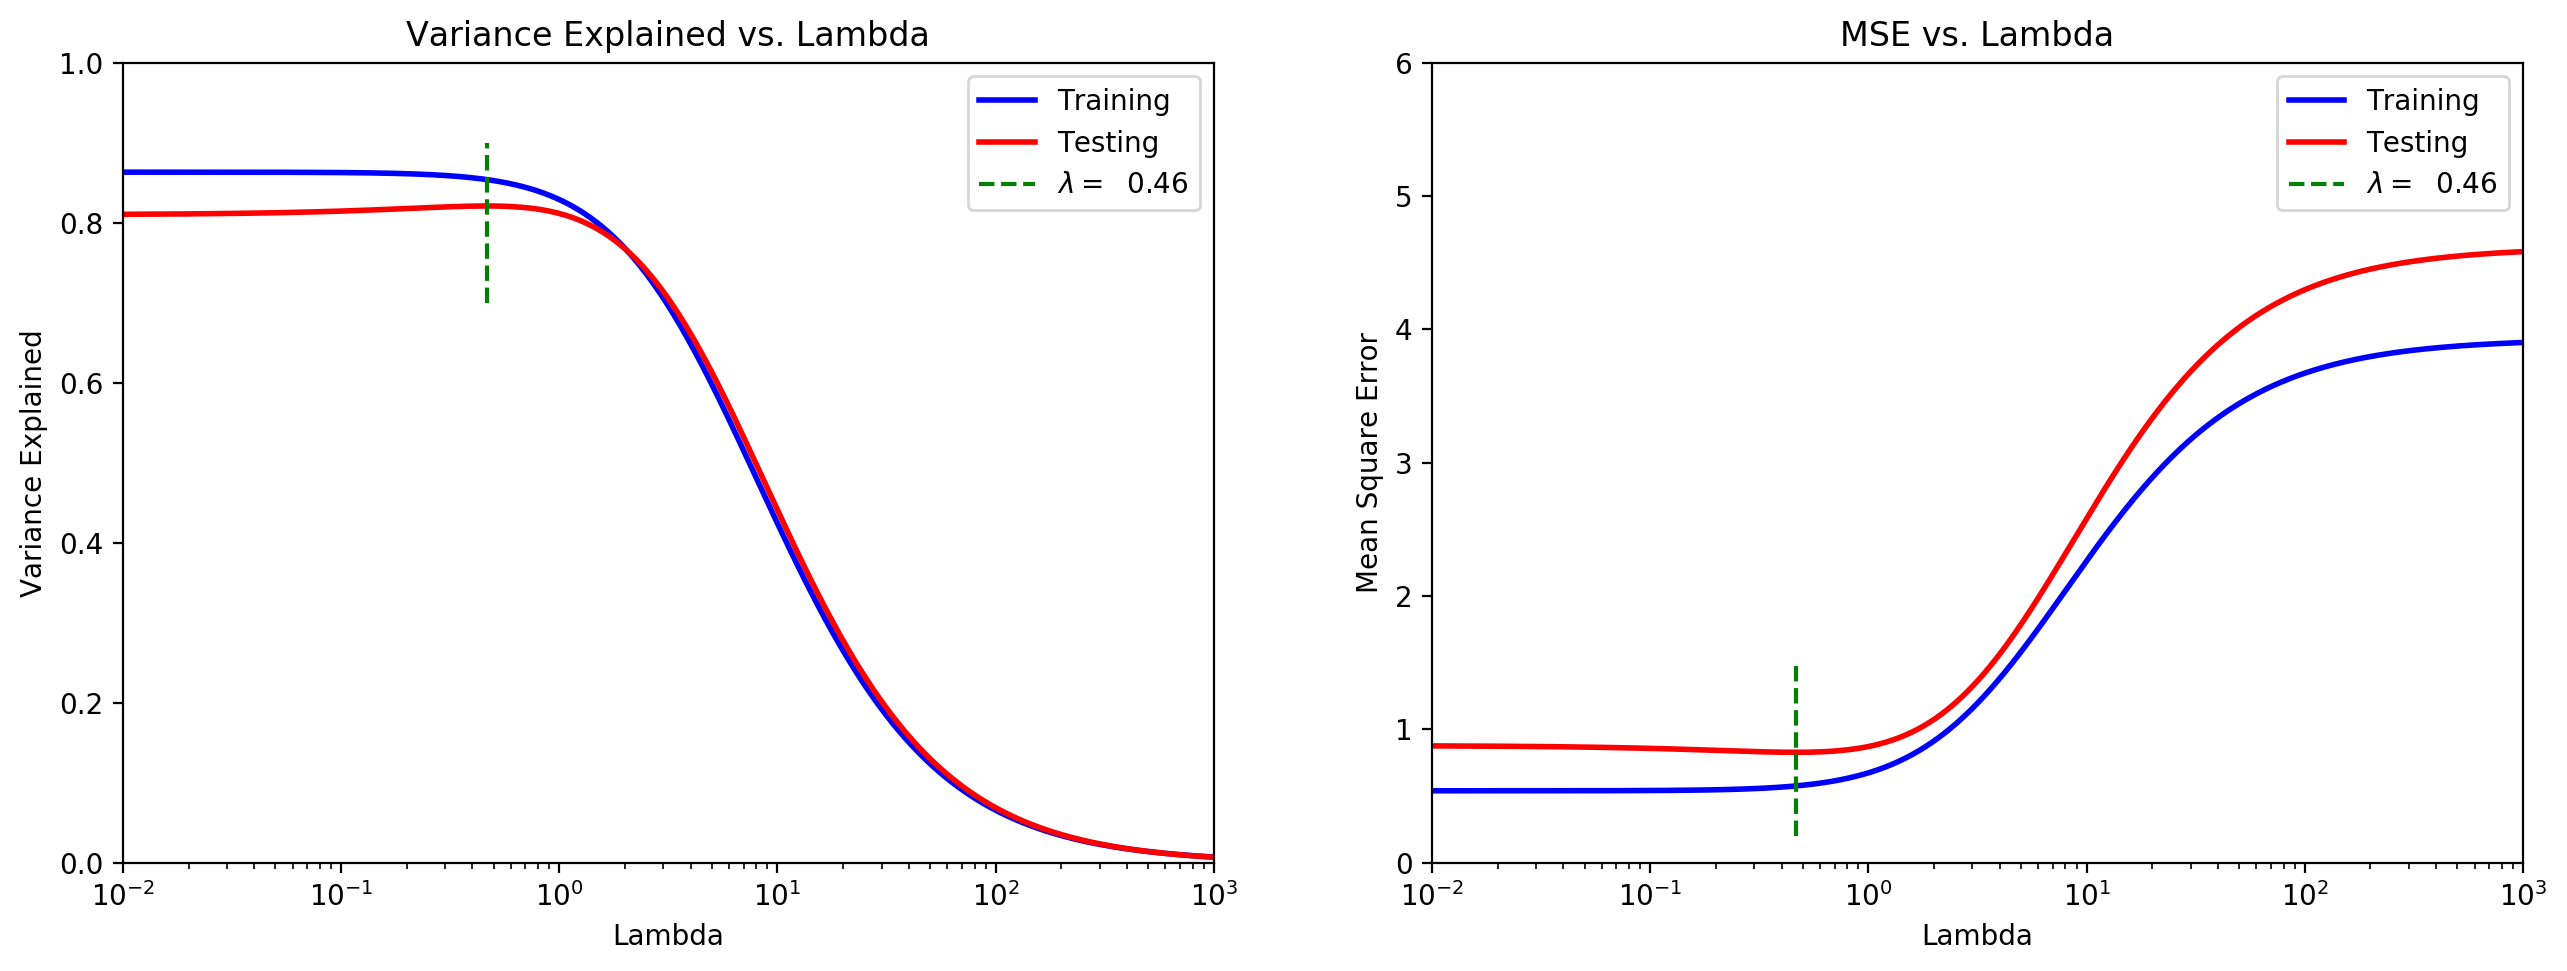

In [32]:
plt.figure(dpi=200)

#data to plot a vertical line at max value of testing data for variance explained
ex=np.zeros(2)
ey=np.zeros(2)
ex[0]=lambda_hyper
ex[1]=lambda_hyper
ey[0]=0.7
ey[1]=0.9

#plot of variance explained vs lambda for both the training and testing data
plt.subplot(121)
plt.semilogx(lamd_mat, var_explained_train,  color='blue', linewidth = 2, label = 'Training')
plt.semilogx(lamd_mat, var_explained_test,  color='red', linewidth = 2, label = 'Testing')
plt.title('Variance Explained vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Variance Explained')
plt.xlim(1e-2,1e3); plt.ylim(0,1.0)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.semilogx(ex,ey,'g--',label='$\lambda = $ {0:5.2f}'.format(lambda_hyper))
plt.legend()

#data to plot a vertical line at min value of testing data for MSE
ex=np.zeros(2)
ey=np.zeros(2)
ex[0]=lambda_hyper
ex[1]=lambda_hyper
ey[0]=0.2
ey[1]=1.5

#plot of MSE vs lambda for both the training and testing data
plt.subplot(122)
plt.semilogx(lamd_mat, mse_train,  color='blue', linewidth = 2, label = 'Training')
plt.semilogx(lamd_mat, mse_test,  color='red', linewidth = 2, label = 'Testing')
plt.title('MSE vs. Lambda'); plt.xlabel('Lambda'); plt.ylabel('Mean Square Error')
plt.xlim(1e-2,1e3); plt.ylim(0,6)
plt.semilogx(ex,ey,'g--',label='$\lambda = $ {0:5.2f}'.format(lambda_hyper))
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3)
plt.show()

<span style="color:blue">**Remarks:**</span>
* Variance explained for both the training and testing data shows a decresing behavior with increasing $\lambda$
* MSE for both the training and testing data shows an increasing behavior with increasing $\lambda$
* The $\lambda$ hyperparameter is selected at the minimum value of MSE with testing, which corresponds to the maximum value of variance explained in testing
* As $\lambda$ approaches to zero, we have a conventional linear regression model
* As $\lambda$ increses the model approaches to the global mean solution 

With the hyperparameter lambda found we proceed to build the model with the correct hyperparameter 

In [33]:
#Lambda hyperparameter found 
lam = lambda_hyper

# Step 1. Initiate the Model 
ridge_reg = Ridge(alpha=lam)

# Step 2: Fit the Data on Training Data
ridge_reg.fit(new_a_train.reshape(-1,1), new_b_train.reshape(-1,1)) # fit model

# Step 3: - Make predictions using the testing dataset
y_pred = ridge_reg.predict(new_a_test.reshape(-1,1))

#Assigment of b1 coefficient and b0 intercept for the tuned linear model
b1=float(ridge_reg.coef_)
b0=float(ridge_reg.intercept_)

We use the linear parameters $b_1$ and $b_0$ to obtain the model parameters of the exponential model previously defined:

\begin{equation}
R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}
\end{equation}

In [34]:
# range of values for t_De to plot the exponential model
a=np.linspace(0,1,100)

# exponential model using the linear model parameters b1 and bo
predicted = 1 / (1 + np.exp(b1 * a + b0))

#Back-transform of the linear data to the scaling time tDe form
c=1/(10**(new_b_train)+1)
d=1/(10**(y_pred)+1)

We show the plots of the exponential model compared to the training and testing data to determine the accuracy of the model to predict recovery

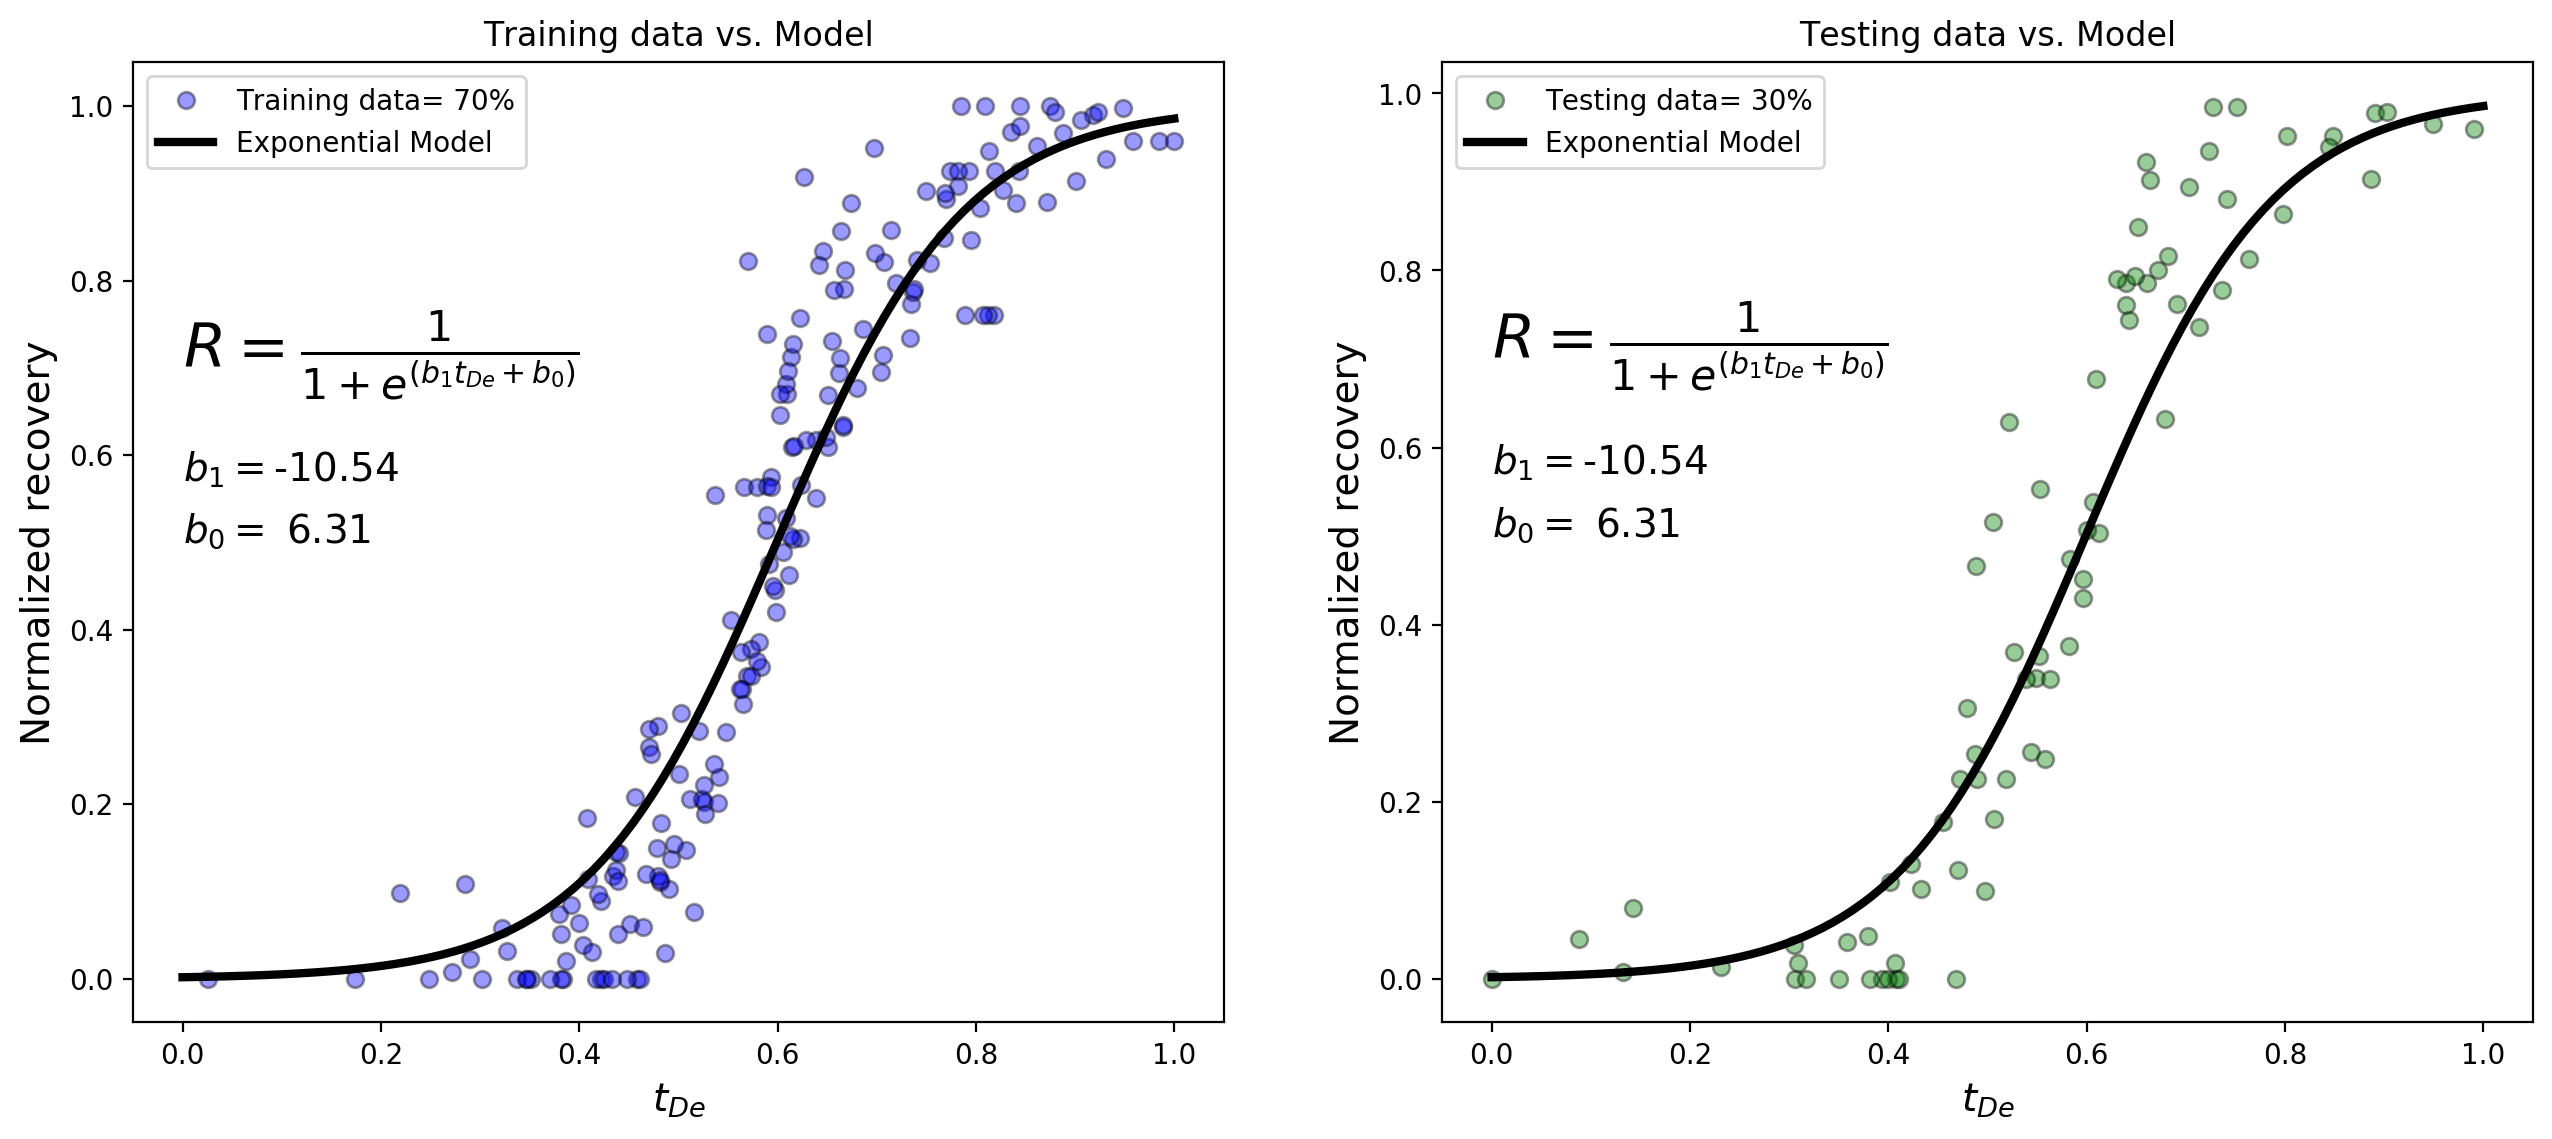

In [35]:
plt.figure(dpi=200)
plt.subplot(121)
plt.plot(X_train,y_train,'o',label='Training data= {0:1.0f}'.format((1-testing_data)*100)+str('%'), color = 'blue', alpha = 0.4, markeredgecolor = 'black')
plt.plot(a, predicted,'-k',linewidth=3,label="Exponential Model")
plt.title('Training data vs. Model')
plt.xlabel('$t_{De}$',fontsize=14)
plt.ylabel('Normalized recovery',fontsize=14)
plt.text(0.0, 0.7, r'$R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}$', fontsize=22)
plt.text(0.0, 0.57, r'$b_1=${0:5.2f}'.format(b1), fontsize=14)
plt.text(0.0, 0.5, r'$b_0=${0:5.2f}'.format(b0), fontsize=14)
plt.legend()

plt.subplot(122)
plt.plot(X_test,y_test, 'o',label='Testing data= {0:1.0f}'.format(testing_data*100)+str('%'), color = 'green', alpha = 0.4, markeredgecolor = 'black')
plt.plot(a, predicted,'-k',linewidth=3,label="Exponential Model")
plt.title('Testing data vs. Model')
plt.xlabel('$t_{De}$',fontsize=14)
plt.ylabel('Normalized recovery',fontsize=14)
plt.text(0.0, 0.7, r'$R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}$', fontsize=22)
plt.text(0.0, 0.57, r'$b_1=${0:5.2f}'.format(b1), fontsize=14)
plt.text(0.0, 0.5, r'$b_0=${0:5.2f}'.format(b0), fontsize=14)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

<span style="color:blue">**Conclusions and remarks:**</span> 
* The exponential model obtained by means of Ridge regression shows to be in good agreement with both the training and testing data
* It is observed that the exponential model has a much better performance than the polynomial model since the characteristics S-shaped form is correctly modeled
* The exponential model strictly goes from zero to one for the recovery, which is a critical condition for real-world results in experimental tests for imbibition.
* We demonstrate that the approximated linear transform of the data enables to use Ridge regression to perform tuning hyperparameter
* It is possible to build a robust model and find the coefficients $b_0$ and $b_1$ for the exponential model

### Results

Here we will be build the final model using the complete dataset but using the correct model complexity to make predictions about oil recovery as a function of the scaling time $t_{De}$ and core properties. The following tasks will be conducted to build the final model:

1. Assign experimental recovery data to a dataframe for accesibility and avoid mixing previous information
2. Remove recovery values $R$ equal to 0 and 1 
3. Calculate $R_l$ with logarithmic function
4. Build Ridge regression model with $\lambda$ hyperparameter found

In [36]:
#1. create dataframe for experimental data
df_line_model = pd.DataFrame({'X_model': df_ori["Norm_time"], 'y_model': df_ori["Norm_recovery"]})

#2. removing the values of R equal to 1 and 0 since the model requires the calculation of log function
df_line_model.drop( df_line_model[ df_line_model["y_model"] == 1 ].index, inplace=True)
df_line_model.drop( df_line_model[ df_line_model["y_model"] == 0 ].index, inplace=True)

#3. calculate Rl with logarithmic fucntion
new_a_model = np.array(df_line_model["X_model"].values)
new_b_model = np.array(df_line_model["y_model"].values) 
new_b_model = np.log((1 / new_b_model) - 1)

#4. Build Ridge regression model using lambda hyperparameter to obtain b1 and bo 
lam = lambda_hyper                                                  #lamdba hyperparameter found 
ridge_reg = Ridge(alpha=lam)                                        #Initialize the Model
ridge_reg.fit(new_a_model.reshape(-1,1), new_b_model.reshape(-1,1)) # fit model to complete data
y_pred = ridge_reg.predict(new_a_model.reshape(-1,1))               #Make predictions using ccomplete data
b1=float(ridge_reg.coef_)                                           #b1 coeeficient for exponential model
b0=float(ridge_reg.intercept_)                                      #b0 coefficient for exponential model

y_res=y_pred-new_b_model                                            #residual from the linear transform


We use the linear parameters $b_1$ and $b_0$ to obtain the model parameters of the exponential model previously defined. We use the model parameters $b_0$ and $b_1$ to calculate $R$ and the residual between the Recovery True and Recovery Estimate values.

\begin{equation}
R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}
\end{equation}

Based on the exponential function and the coefficients $b_0$ and $b_1$ we perform the following steps:
1. Build exponential recovery model
2. Calculate recovery using the exponential model and true time $t_{De}$
3. Estimate of residual: Recovery True - Recovery Estimate

In [37]:
#1. Build exponential recovery model
a_model=np.linspace(0,1,100)                 # range of values for t_De to plot the exponential model
model = 1 / (1 + np.exp(b1 * a_model + b0))  # exponential model using the linear model parameters b1 and bo

#2. Calculate recovery with model and usng true tDe values
mo = 1 / (1 + np.exp(b1 *df_ori["Norm_time"]  + b0))

#3. Residual calculation: Recovery True-Recovery Estimate
residual=(df_ori["Norm_recovery"]-mo)

Finally, we present a set of plots to summarize the results obtained by processing experimental data of oil recovery from core samples in order to build a predictive exponential model that enables the estimaate of oil recovery as a function of the scaling time $t_{De}$. The following code block shows a summary of the work done using machine learning methods:
1. Plot of normalized recovery for Berea core samples (13)
2. Plot of normalized recovery for Spraberry core samples (15)
3. Plot of normalized recovery for Spraberry and Berea cores with scaling time $t_{D}$ used for clustering
4. Plot of normalized recovery for Spraberry and Berea cores with scaling time $t_{De}$, and exponential model 
5. Plot of Recovery Estimate versus Recovery True 
6. Histogram of frequency for residual (Recovery True - Recovery Estimate)
7. Plot of Residual error versus Recovery Estimate
8. Plot of selected Berea cores to compare the exponential model using time in hours 
9. Plot of selected Selected cores to compare the exponential model using time in hours 

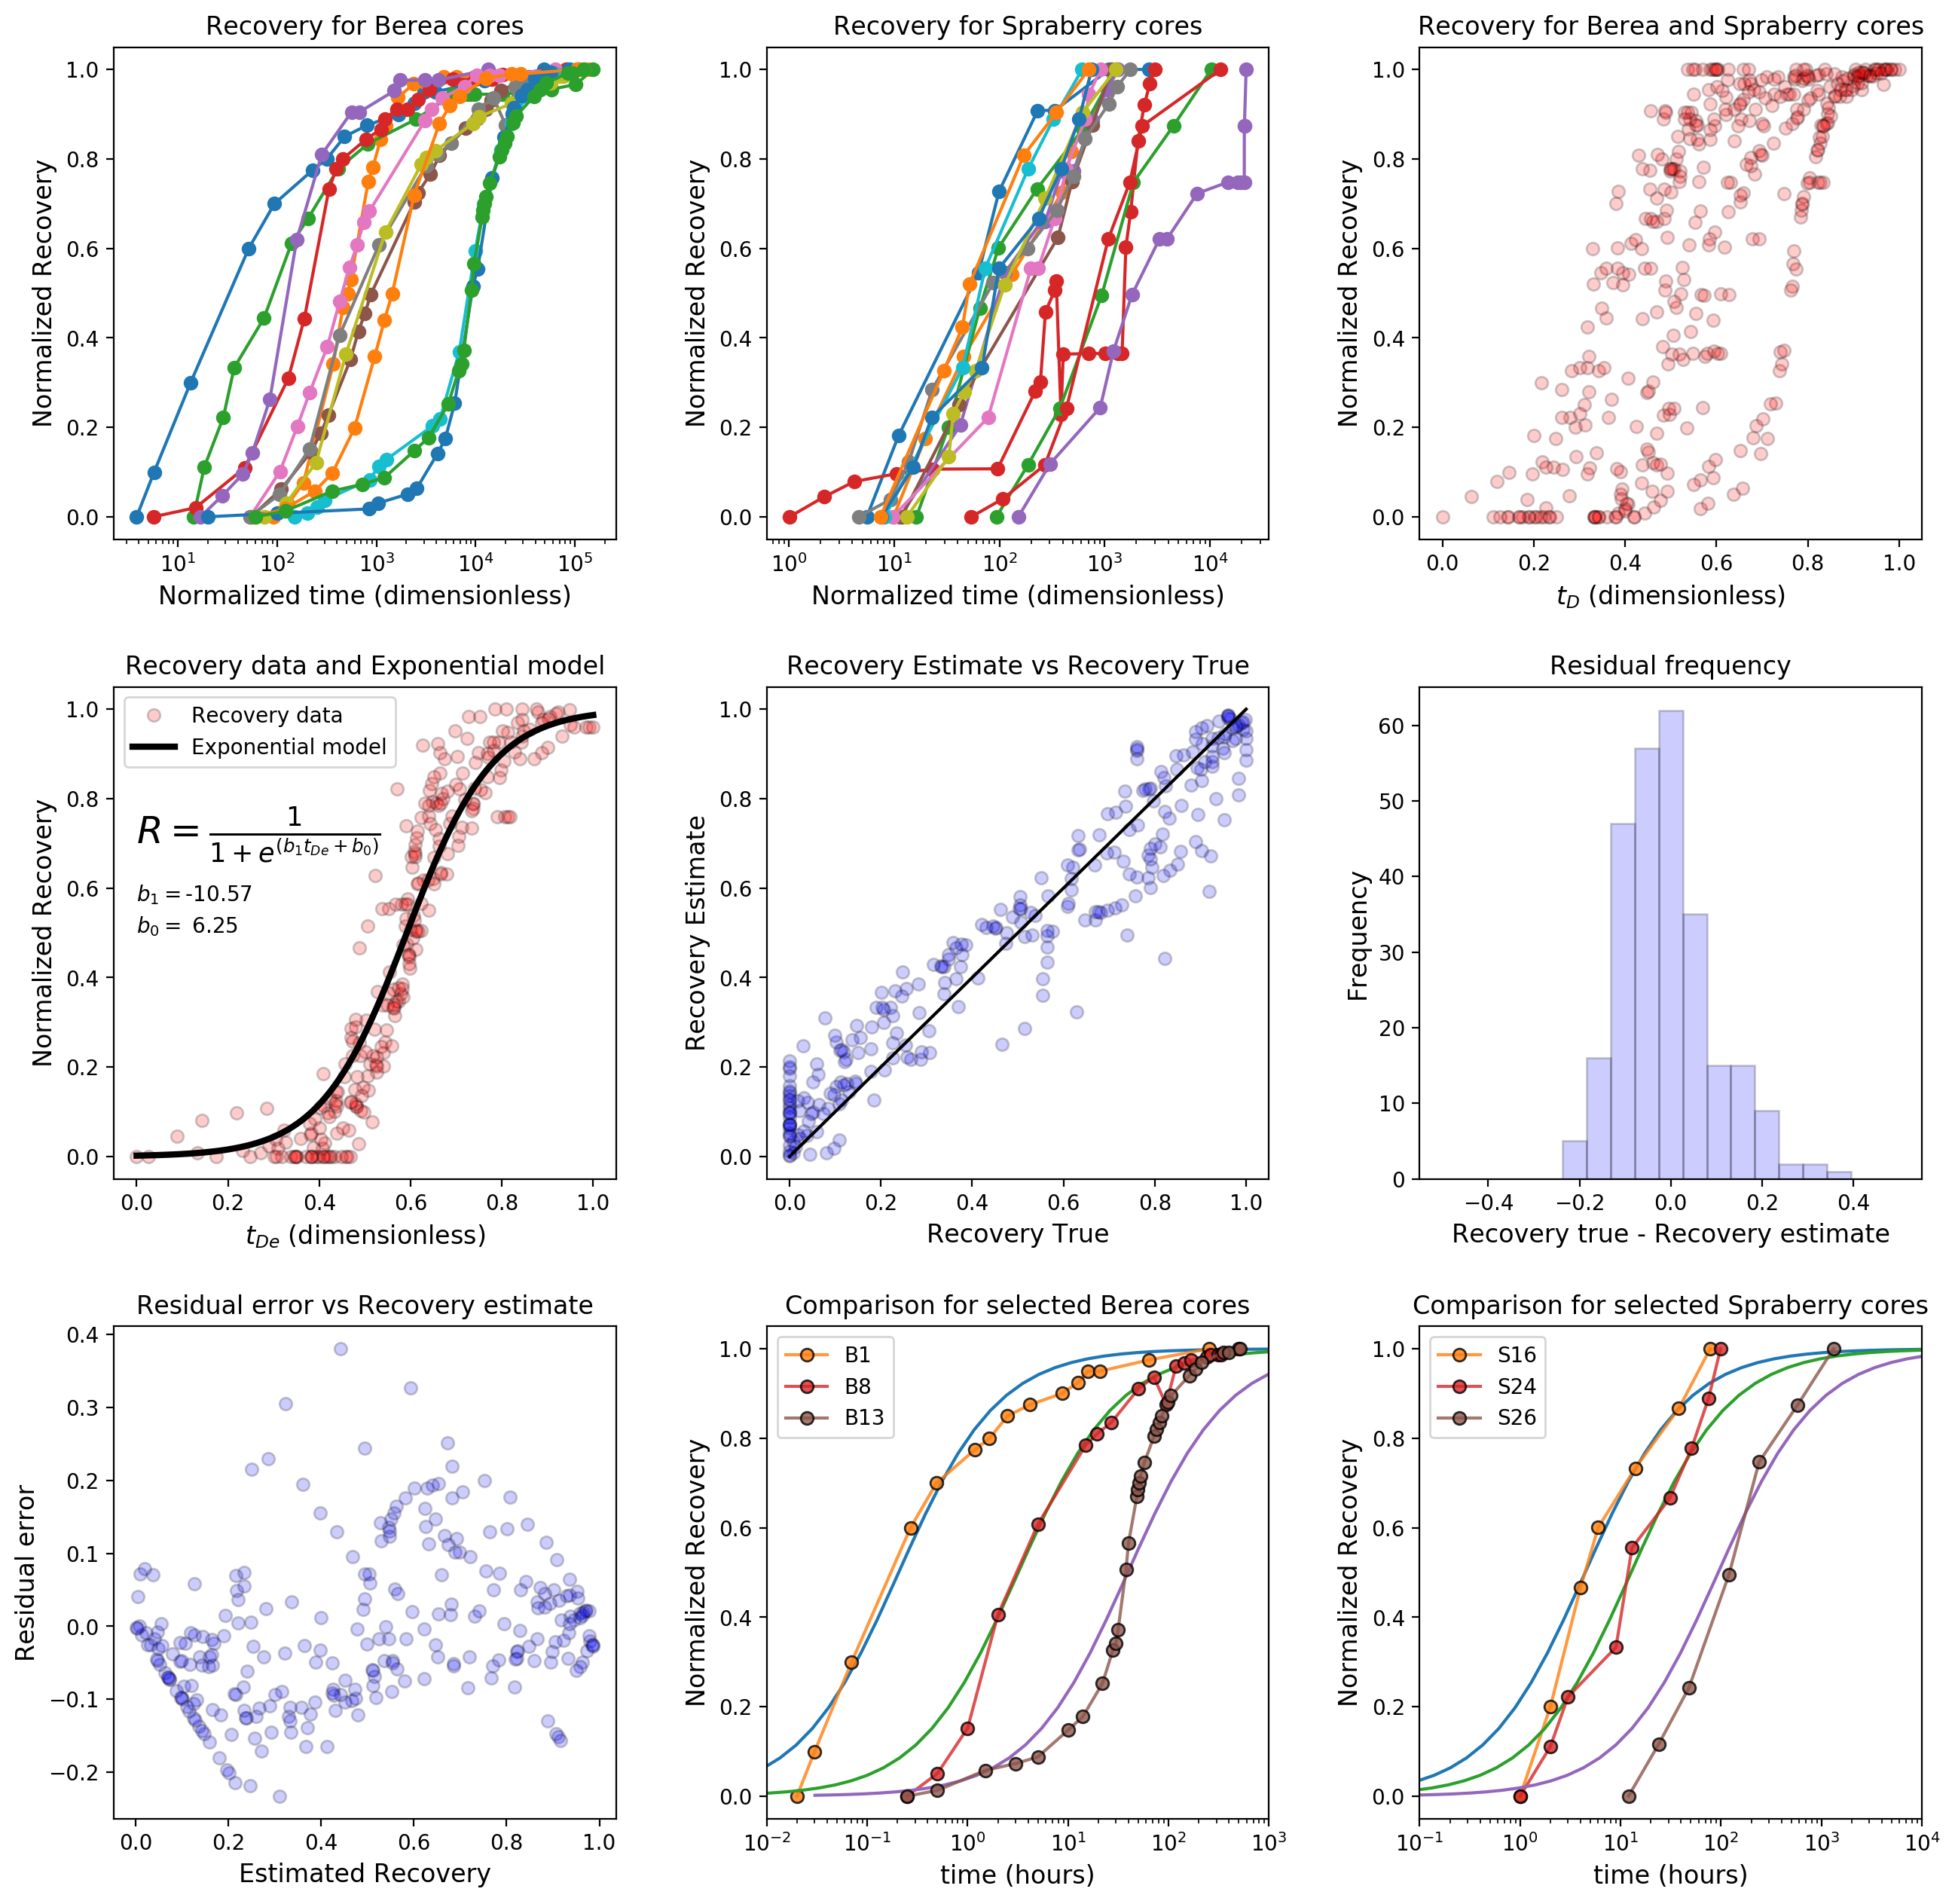

In [38]:
plt.figure(dpi=200)

#Plot of normalized recovery data as a function of time for Berea cores-------
plt.subplot(431)
for i in range (0,13):
    plt.semilogx(sample.iloc[:,2*i],sample.iloc[:,2*i+1],'o-') 
plt.title('Recovery for Berea cores')
plt.xlabel('Normalized time (dimensionless)', fontsize=12)
plt.ylabel('Normalized Recovery', fontsize=12)

#Plot of normalized recovery data as a function of time for Spraberry cores---
plt.subplot(432)
for i in range (13,28):
    plt.semilogx(sample.iloc[:,2*i],sample.iloc[:,2*i+1],'o-') 
plt.title('Recovery for Spraberry cores')
plt.xlabel('Normalized time (dimensionless)', fontsize=12)
plt.ylabel('Normalized Recovery', fontsize=12)

#Plot of normalized recovery data as a function of tD for Berea and Spraberry cores--------
plt.subplot(433)
plt.plot(df['Norm_time'], df['Norm_recovery'],'bo', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.title('Recovery for Berea and Spraberry cores',fontsize=12)
plt.xlabel('$t_D$ (dimensionless)', fontsize=12)
plt.ylabel('Normalized Recovery', fontsize=12)
 
#Plot of normalized recovery data as a function of tDe for Berea and Spraberry cores-------
#and exponential model
plt.subplot(434)
plt.plot(df_ori["Norm_time"],df_ori["Norm_recovery"], 'bo', label='Recovery data', color = 'red', alpha = 0.2, markeredgecolor = 'black')
plt.plot(a_model, model,'-k',linewidth=3,label="Exponential model")
plt.title('Recovery data and Exponential model',fontsize=12)
plt.xlabel('$t_{De}$ (dimensionless)',fontsize=12)
plt.ylabel('Normalized Recovery',fontsize=12)
plt.text(0.0, 0.7, r'$R=\frac{1}{1+e^{(b_1 t_{De} + b_0) }}$', fontsize=18)
plt.text(0.0, 0.57, r'$b_1=${0:5.2f}'.format(b1), fontsize=10)
plt.text(0.0, 0.5, r'$b_0=${0:5.2f}'.format(b0), fontsize=10)
plt.legend()

#Plot of cross validation----------------------------------------------------- 
up=[0,1]
do=[0,1]
plt.subplot(435)
plt.plot(df_ori["Norm_recovery"], mo,'o', color = 'blue', alpha = 0.2, markeredgecolor = 'black')
plt.plot(up,do,'-k')
plt.title('Recovery Estimate vs Recovery True',fontsize=12)
plt.xlabel('Recovery True',fontsize=12)
plt.ylabel('Recovery Estimate',fontsize=12)

#Plot of frequencies for Residual error--------------------------------------- 
plt.subplot(436)
plt.hist(residual, color = 'blue', alpha = 0.2, edgecolor = 'black', bins = np.linspace(-0.5,0.5,20))
plt.title("Residual frequency",fontsize=12)
plt.xlabel('Recovery true - Recovery estimate',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

#Plot of residual error vs recovery estimate----------------------------------
plt.subplot(437)
plt.plot(mo, residual,'o', color = 'blue', alpha = 0.2, markeredgecolor = 'black')
plt.title('Residual error vs Recovery estimate',fontsize=12)
plt.xlabel('Estimated Recovery',fontsize=12)
plt.ylabel('Residual error',fontsize=12)

#Plot of selected Berea cores to compare with the exponential model-----------
plt.subplot(438)
tms=np.linspace(0,1.5,50)
for i in range (0,28):
    reco=1/(1+np.exp(b1*tms+b0))
    ti=tms*(timemax-timemin)+timemin
    ti=10**ti/m[i]**2
    times=ti/(14.64*((core.iloc[i,1]/(core.iloc[i,0]/100))**0.5*((2*core.iloc[i,2]**2+4*(0.5*core.iloc[i,3])**2)/(core.iloc[i,2]**2*(0.5*core.iloc[i,3])**2))**2))          
    if i==0  or i==7 or i==12:        
        plt.semilogx(times,reco)
        plt.semilogx(new.iloc[:,2*i],sample.iloc[:,2*i+1],'-o',label='B{0:1.0f}'.format(i+1), alpha = 0.8, markeredgecolor = 'black')
plt.title('Comparison for selected Berea cores',fontsize=12)
plt.xlabel('time (hours)',fontsize=12)
plt.ylabel('Normalized Recovery',fontsize=12)
plt.xlim(1e-2,1e3) 
plt.legend()

#Plot of selected Spraberry cores to compare with the exponential model-------
plt.subplot(439)
tms=np.linspace(0,1.5,50)
for i in range (0,28):
    reco=1/(1+np.exp(b1*tms+b0))
    ti=tms*(timemax-timemin)+timemin
    ti=10**ti/m[i]**2
    times=ti/(14.64*((core.iloc[i+12,1]/(core.iloc[i+12,0]/100))**0.5*((2*core.iloc[i+12,2]**2+4*(0.5*core.iloc[i+12,3])**2)/(core.iloc[i+12,2]**2*(0.5*core.iloc[i+12,3])**2))**2))          
    if i==15  or i==23 or i==25:        
        plt.semilogx(times,reco)
        plt.semilogx(new.iloc[:,2*i],sample.iloc[:,2*i+1],'o-',label='S{0:1.0f}'.format(i+1), alpha = 0.8, markeredgecolor = 'black')
plt.title('Comparison for selected Spraberry cores',fontsize=12)
plt.xlabel('time (hours)',fontsize=12)
plt.ylabel('Normalized Recovery',fontsize=12)
plt.xlim(1e-1,1e4) 
plt.legend()
                
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4, wspace=0.3, hspace=0.3)
plt.show()

In [39]:
print('Variance explained: %.2f' % r2_score(new_b_model, y_pred))
print('Residual: mean = ' + str(round(np.average(y_res),2)) + ', standard deviation = ' + str(round(np.std(y_res),2)))

Variance explained: 0.84
Residual: mean = 0.0, standard deviation = 2.68


<span style="color:blue">**Conclusions and remarks:**</span> The exponential model presented represents an alternative solution to accurately predict oil recovery obtained from experimental imbibition data in core samples by using machine learning methods. Here we grouped the individual information of each core to have a general model instead of multiple, impractical solutions. As summary we highlight the following:

* Data preparation is a critical task as shown in this workflow. We performed an exhaustive processing of the data before building the model.
* The recovery normalization and simple scaling of time using $t_D$ enables the grouping of the data for clustering .
* K-means and Spectral clustering methods are efficient to approximately split the data into early- and late-time behavior given the characteristic S-shaped form, in which a concave and convex behaviors occur. 
* Time can be correctly scaled using $t_{De}$ to have a narrower distribution before building the predictive model.
* The use of a Hermite polynomial model shows a good performance but is very sensitive to training data and outliers resulting in variable and different polynomial order, and in an unstable model for extrapolation.
* A linear transformation of the data enables to use Ridge regression to build a robust model by hyperparameter tuning.  
* The model parameters $b_0$ and $b_1$ for the exponential model are obtained from the Ridge regression model
* An exponential model to predict oil recovery is built, which correctly models the S-shaped form of the data showing a residual error distribution close to zero
* The validation of Recovery Estimate and Recovery True shows a narrow distribution close to the diagonal, which is the measure of model performance 
* The residaul error is centered on zero having a narrow distribution, which indicates the model is in good agreement with the data used
* The model is compared with Berea and Spraberry data using original time in hours, observing the model performs with a high accuracy after back-transformation of the scaling time $t_{De}$ but maintaining the model parameters $b_0$ and $b_1$

### Comments

The worflow presented is an alternative solution to model experimental oil recovery data (characteristic S-shaped form) obtained from imbibition tests using core samples. I am working on extending the approach considering dynamic conditions and using wettability modifiers to increase oil recovery as part of my doctoral research.

I am a PhD student at The University of Texas at Austin conducting research in Enhanced Oil Recovery (EOR) methods, Numerical Simulation and Modeling of Chemical Tracers in Naturally Fractured Reservoirs. I can be reached at moises.vl@utexas.edu



I hope this was helpful,

*Moisés Velasco*
 

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
